# Lending club case study
## High level approach 
- Understand the data 
- Import the data and analyse the data 
- Perform data clean up 
- Univariate analysis 
- Observations
- BiVariate analysis 
- Observations

In [25]:
# Importing all the python libraries here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# Load the csv file from disk
loan = pd.read_csv('loan.csv', low_memory=False)

In [27]:
## Describe and have a high level view of dataframe loaded 
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


# Data clean up 

### We will not need all columns which has only NAN value as it is does not have impact on the analysis

In [28]:
# drop all columns with NAN values 
loan.dropna(axis=1, how='all', inplace=True)

In [29]:
#Analysing the amount of NA values in each column
na_columns = round(loan.isnull().sum()/len(loan.index)*100, 2)
na_columns

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

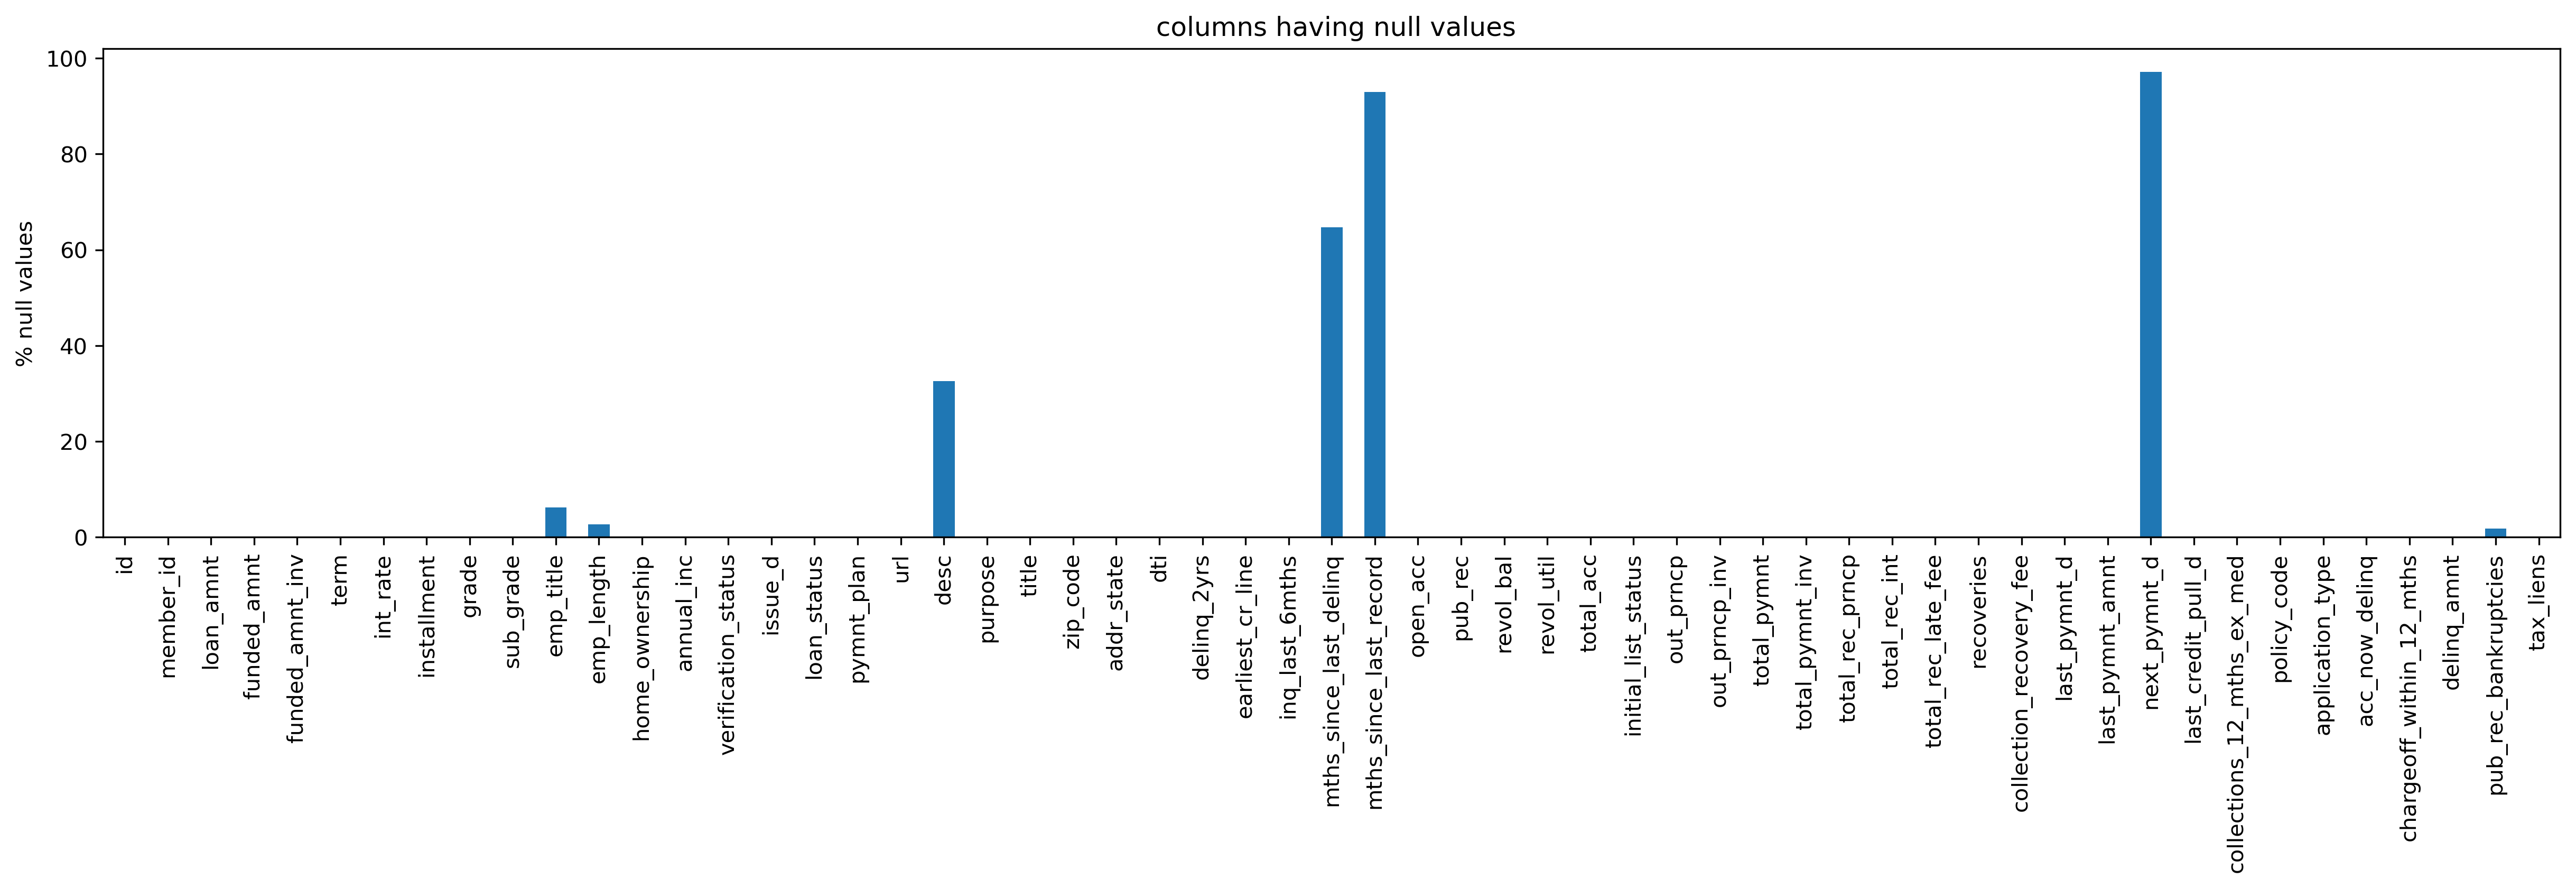

In [30]:
plt.figure(figsize= (20,4),dpi=300)
na_columns.plot(kind = 'bar')
plt.title (' columns having null values')
plt.ylabel('% null values')
plt.show()

### We are not done yet, we will be further looking at other columns with more proportion of NAN value and try to eliminiate them

#### Further looking at the other columns we will try to understand if we have same values across the columns and eliminate such columns 

In [31]:
# Converting the object type to String to check unique values in the column
loan.pymnt_plan = loan['pymnt_plan'].astype('string')

In [32]:
# using unique to check value sets present in the pymnt_plan column 
loan.pymnt_plan.unique()

<StringArray>
['n']
Length: 1, dtype: string

In [33]:
# using unique to check value sets present in the column 
loan.application_type.unique()

array(['INDIVIDUAL'], dtype=object)

In [34]:
# using unique to check value sets present in the column 
loan.delinq_amnt.unique()

array([0], dtype=int64)

In [35]:
# using unique to check value sets present in the column 
loan.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [36]:
# using unique to check value sets present in the column 
loan.acc_now_delinq.unique()

array([0], dtype=int64)

In [37]:
# using unique to check value sets present in the column 
loan.policy_code.unique()

array([1], dtype=int64)

In [38]:
# using unique to check value sets present in the column 
loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [39]:
# pub_rec_bankruptcies has predominantly zeroes and hence we can eliminate that coulumn too 
loan.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [40]:
# only 2% of ros only has next scheduled date value hence we can eliminate this too 
loan.next_pymnt_d.value_counts()

Jun-16    1125
Jul-16      15
Name: next_pymnt_d, dtype: int64

In [41]:
# There is no charge off within 12 months 
loan.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [42]:
# unique policy code across dataframe
loan.policy_code.value_counts()

1    39717
Name: policy_code, dtype: int64

In [43]:
# pub_rec is predominantly filled in by zeroes hence we can eliminate
loan.pub_rec.value_counts()

0    37601
1     2056
2       51
3        7
4        2
Name: pub_rec, dtype: int64

In [44]:
#Analysing the values in recoveries column
loan.recoveries.value_counts()

0.00       35499
11.29          4
10.40          4
10.66          3
44.92          3
           ...  
764.69         1
653.08         1
1080.96        1
878.19         1
21.29          1
Name: recoveries, Length: 4040, dtype: int64

In [45]:
# title consists of random values
loan.title.value_counts()

Debt Consolidation                  2184
Debt Consolidation Loan             1729
Personal Loan                        659
Consolidation                        517
debt consolidation                   505
                                    ... 
your rate is better than my rate       1
Concession Trailer                     1
gregs                                  1
EZover                                 1
JAL Loan                               1
Name: title, Length: 19615, dtype: int64

In [46]:
# majority are zeroes hence we can eliminate this column
loan.total_rec_late_fee.value_counts()

0.000000     37671
15.000000      255
15.000000       58
30.000000       55
15.000000       47
             ...  
35.286832        1
15.000000        1
14.777500        1
14.967774        1
19.890000        1
Name: total_rec_late_fee, Length: 1356, dtype: int64

In [47]:
# we can eliminate as this is a unique url for the loan id which we already has in id column 
loan.url.value_counts()

https://lendingclub.com/browse/loanDetail.action?loan_id=1077501    1
https://lendingclub.com/browse/loanDetail.action?loan_id=568534     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=567165     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568531     1
                                                                   ..
https://lendingclub.com/browse/loanDetail.action?loan_id=785667     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785630     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785626     1
https://lendingclub.com/browse/loanDetail.action?loan_id=87023      1
Name: url, Length: 39717, dtype: int64

In [48]:
# This is a public data hence we can eliminate this coulmn
loan.zip_code.value_counts()

100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
        ... 
381xx      1
378xx      1
739xx      1
396xx      1
469xx      1
Name: zip_code, Length: 823, dtype: int64

In [49]:
# Dropping the above analysed column and the reason is mentioned in the respective code block itself for clarity
loan.drop(['pymnt_plan', 'application_type', 'delinq_amnt', 'chargeoff_within_12_mths', 
         'acc_now_delinq', 'policy_code', 'collections_12_mths_ex_med', 'tax_liens', 'initial_list_status', 
         'pub_rec_bankruptcies', 'next_pymnt_d', 'chargeoff_within_12_mths', 'policy_code', 'pub_rec',
         'recoveries', 'title', 'total_rec_late_fee', 'url', 'zip_code', 'desc', 'addr_state'], 
         axis=1, inplace=True)

### Standardising numbers
#### There could be data which is is eligible to be a number but marked as object columns due to numerical representations such as percentage %, greater > , lesser <, etc.. 
#### we will try to look up such data and try to correct them into number format

In [50]:
# Replace all % values in interest rate columns and convert it to float type
loan['int_rate'] = loan['int_rate'].apply(lambda x: float(x.replace('%', '')))

In [51]:
#Defining a function to remove the extra character available in emp_colum accordingly to convert it to a proper int datatype
def extractnumber(emp_len):
       if '<' in emp_len:
        return '0'
       elif '+' in emp_len:
        return emp_len.split('+')[0]
       else:
        return emp_len.split()[0]

loan['emp_length'].fillna(loan['emp_length'].mode()[0], inplace=True)      
loan["emp_length"] = loan["emp_length"].astype(str)
loan["emp_length"] = loan["emp_length"].apply(extractnumber)
loan["emp_length"] = pd.to_numeric(loan["emp_length"])

In [52]:
#The emp_length column is converted to integer datatype
loan["emp_length"].value_counts()

10    9954
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [53]:
#There are 3 unique categories avalable in loan_status column
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [54]:
#The current loan_status cannot be used in our objective predict if we can give loan or not as we dont have full data yet. 
# So removing the rows with current loan_Status
loan = loan[loan['loan_status'] != 'Current']

In [55]:
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [56]:
#converting grade and subgrade column to string
loan['grade'] = loan['grade'].astype('string')
loan['sub_grade'] = loan['sub_grade'].astype('string')

In [57]:
#Analysing the GRADE and SUBGRADE column
loan.apply(lambda x : True if x['grade'] == x['sub_grade'][0] else False,axis=1).value_counts()

True    38577
dtype: int64

In [58]:
#Hence removing the first character of sub_grade 
loan['sub_grade'] = loan['sub_grade'].apply(lambda x : x[1] if len(x) > 1 else x)

In [59]:
loan['sub_grade']

0        2
1        4
2        5
3        1
5        4
        ..
39712    4
39713    1
39714    4
39715    2
39716    2
Name: sub_grade, Length: 38577, dtype: object

In [60]:
#Analysing mths_since_last_delinq column 
loan.mths_since_last_delinq.isna().sum()

24905

In [61]:
#Analysing mths_since_last_record column 
loan.mths_since_last_record.isna().sum()

35837

In [62]:
#Droping mths_since_last_delinq, mths_since_last_record columns since they have NA columns more 50% of the rows
loan.drop(columns=['mths_since_last_delinq', 'mths_since_last_record'], axis=1 ,inplace = True )

In [63]:
#removing the % in revol_util field at end
loan.revol_util = loan.revol_util.astype('string')
loan.revol_util = loan.revol_util.apply(lambda x: float(x[:-1]) if not pd.isna(x) else x)

In [64]:
#By analysing mean, median and mode of revol util.
print("Mode :" + str(loan.revol_util.mode())[0])
print("Mean :" + str(loan.revol_util.mean()))
print("Median :" + str(loan.revol_util.median()))
loan.revol_util.value_counts()

Mode :0
Mean :48.70277675396472
Median :49.1


0.00     954
0.20      62
63.00     62
40.70     57
31.20     57
        ... 
77.63      1
25.74      1
0.83       1
47.36      1
7.28       1
Name: revol_util, Length: 1088, dtype: int64

In [65]:
#Analysing above mean and mode values. We could infer that the mode 0.00 is be repeated more than mean value.
loan.revol_util.fillna(loan.revol_util.mode()[0],inplace=True)

In [66]:
# Employee title column analysis
len(pd.unique(loan.emp_title))

28028

In [67]:
#emp_title column is text. We are dropping it as it can't be used derive insights.
loan.drop('emp_title', axis=1, inplace=True)

In [68]:
#Now we still have two columns with NA values
loan.isna().sum()

id                          0
member_id                   0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
revol_bal                   0
revol_util                  0
total_acc                   0
out_prncp                   0
out_prncp_inv               0
total_pymnt                 0
total_pymnt_inv             0
total_rec_prncp             0
total_rec_int               0
collection_recovery_fee     0
last_pymnt_d               71
last_pymnt

In [69]:
#droping last_paymnt_d column
loan.drop('last_pymnt_d', axis=1, inplace=True)

In [70]:
loan.isna().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
collection_recovery_fee    0
last_pymnt_amnt            0
last_credit_pull_d         2
dtype: int64

In [71]:
# As data dictionary states this date does not signifies <The most recent month LC pulled credit for this loan> anything about loan eligibility 
# Hence we can remove column last_credit_pull_d
loan.drop('last_credit_pull_d', axis=1, inplace=True)

In [72]:
loan.isna().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
collection_recovery_fee    0
last_pymnt_amnt            0
dtype: int64

# Univariate analysis

## What are we planning to acheive

- Analyse single column level values by their respective category such as categorical, ordered categorical and quantitative
- Understand the data distribution by plotting the box plots and handle outliers 
- Extract new columns if existing column can be the source for new ones
- Cleaning up the rows where ever it is required

### Unordered categorical
#### Frequency Chart for loan status variable

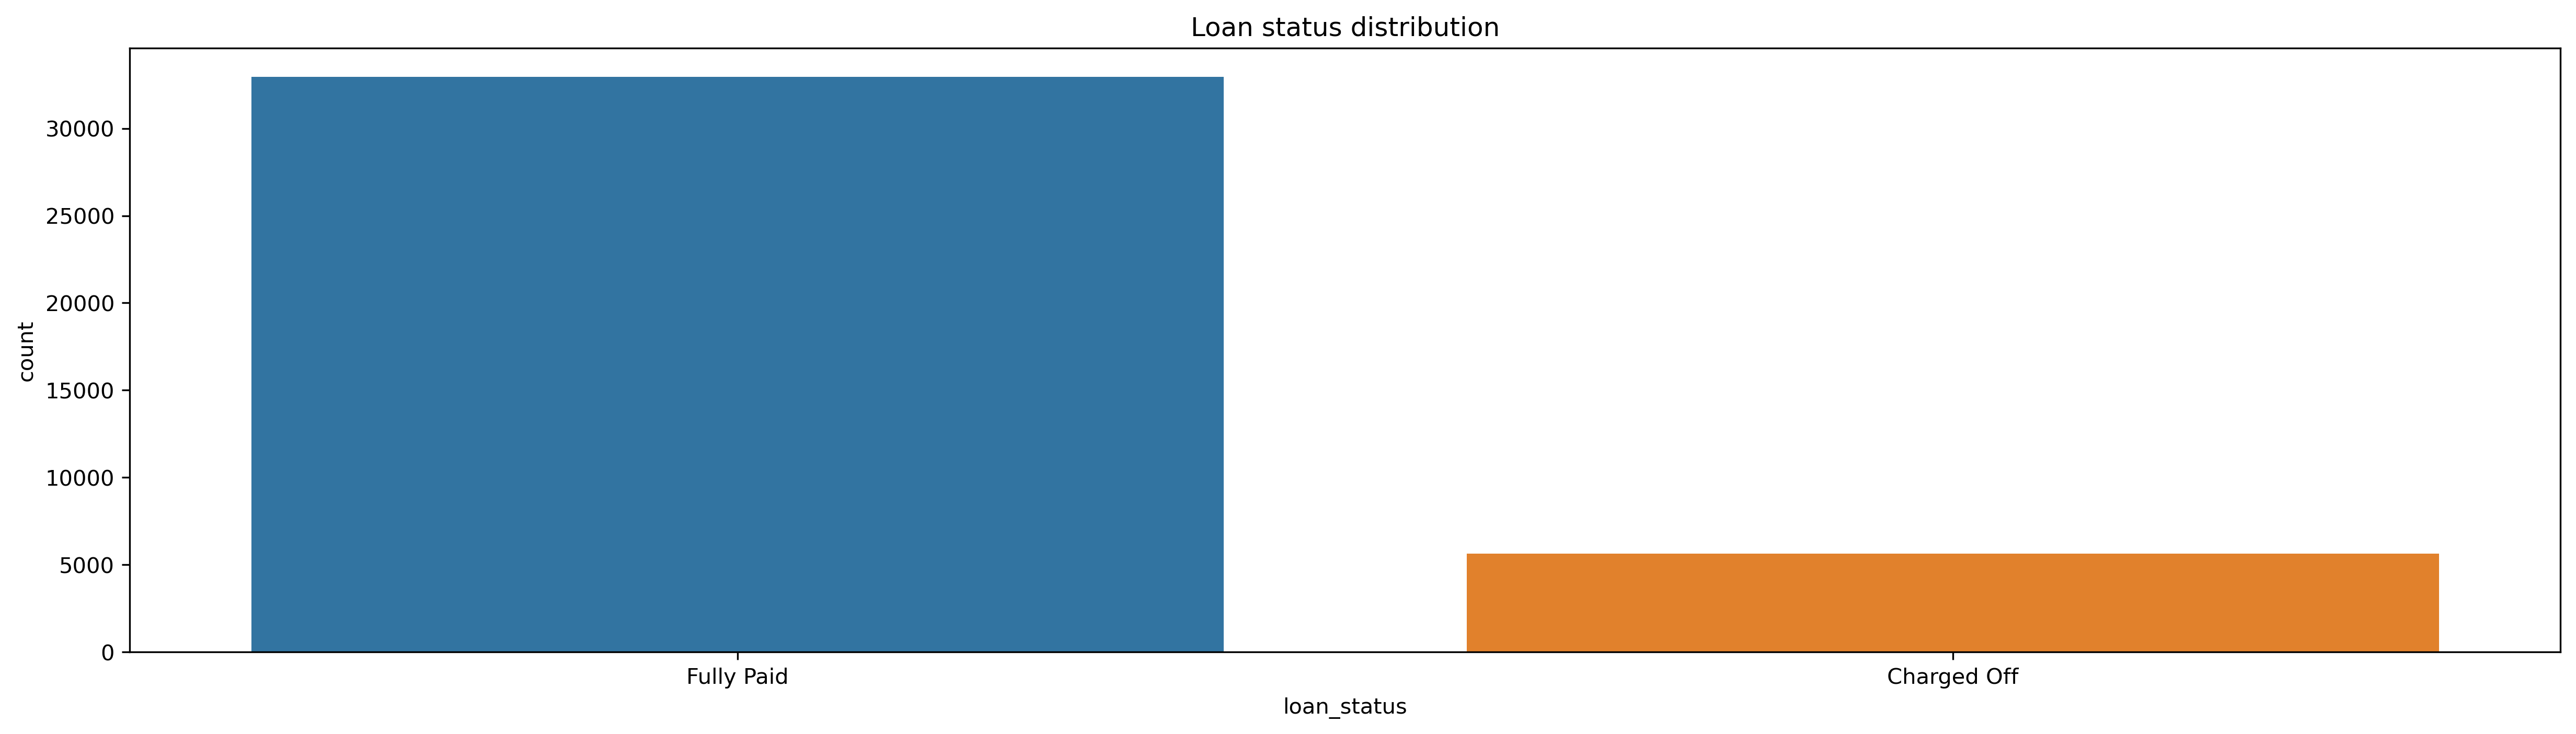

In [73]:
# loan['loan_status'].value_counts().plot.bar()
plt.figure(figsize= (20,5),dpi=300)
plt.style.use('default')
sns.countplot(x = 'loan_status', data = loan)
plt.title('Loan status distribution')
plt.show()

#### Inference:
    1. The above chart depicts the distribution of fully paid vs defaulters. We will apply loan_status column in bivariate 
    and multivariate to gather some more insights. 

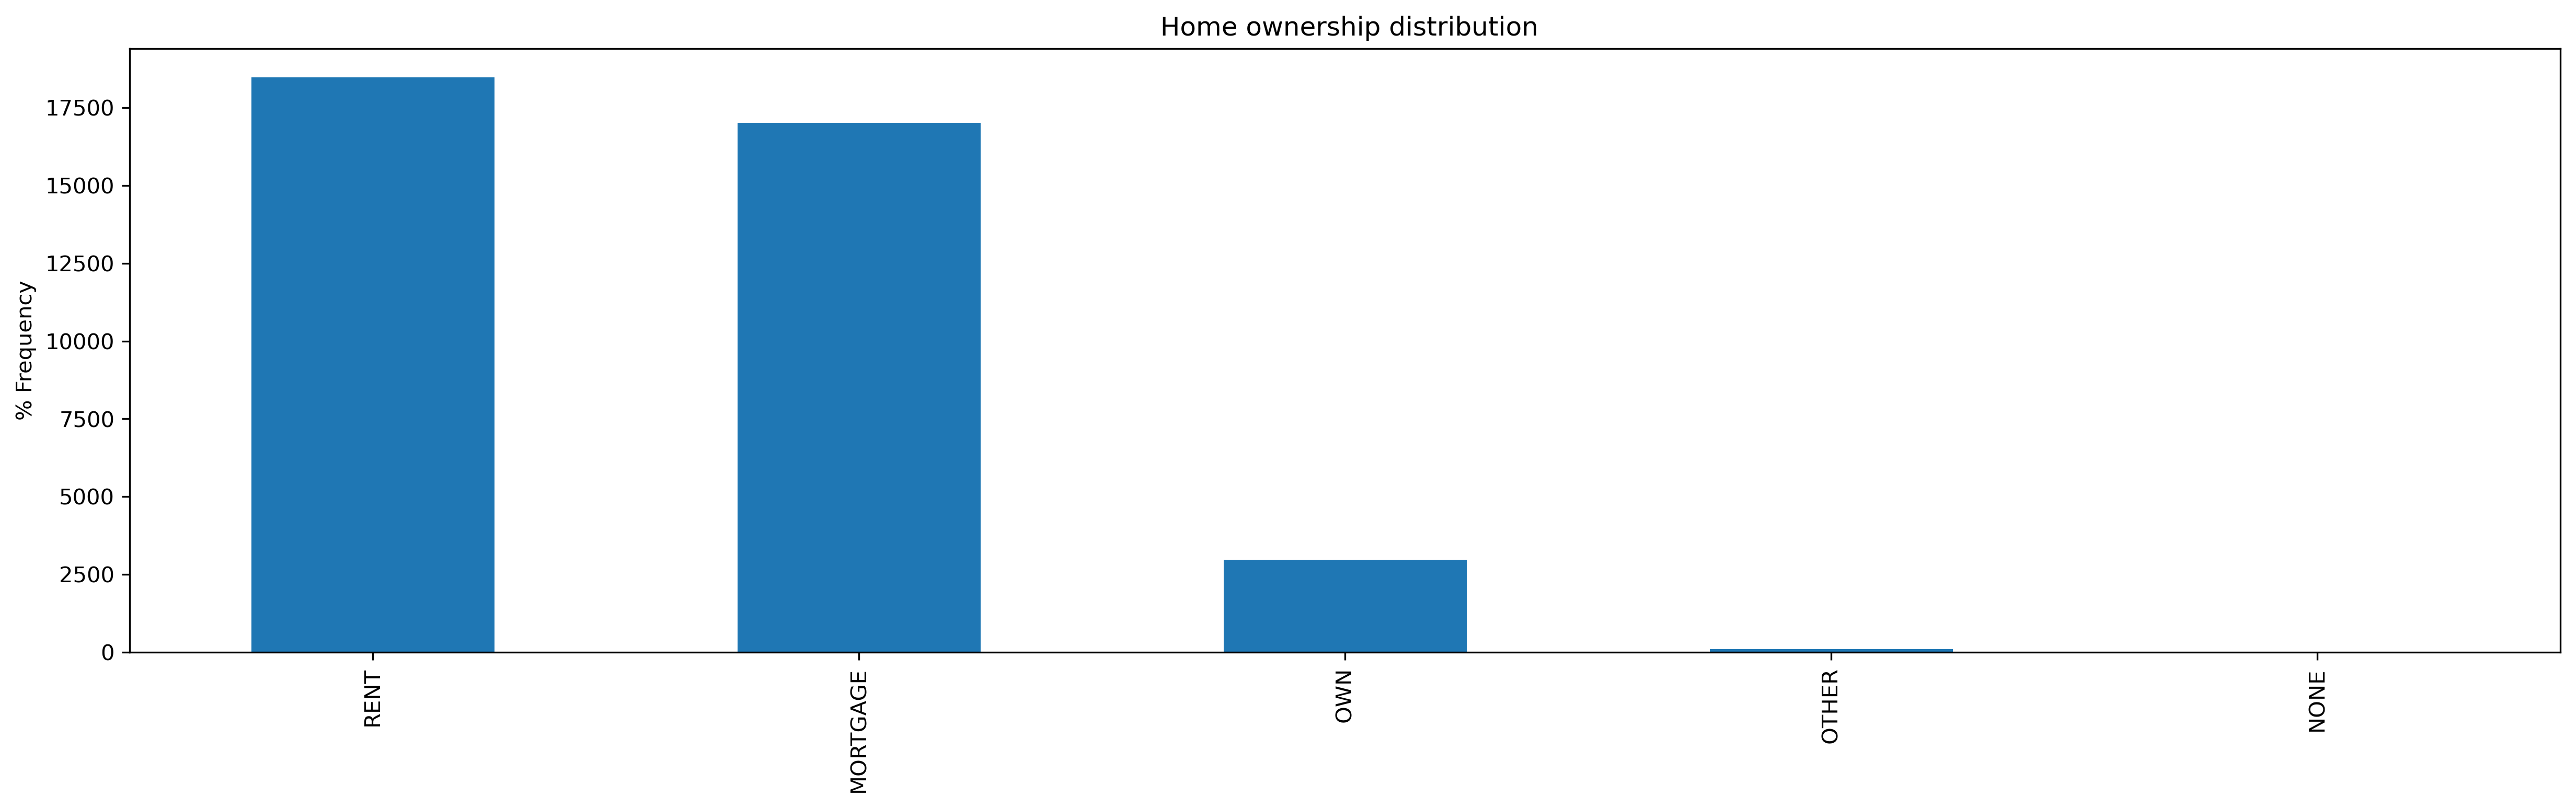

In [74]:
plt.figure(figsize= (20,5),dpi=300)
loan.home_ownership.value_counts().plot(kind = 'bar')
plt.title (' Home ownership distribution')
plt.ylabel('% Frequency')
plt.show()

#### Observation:
    1. The people who are in rent or mortgage houses have more tendency to apply for loan.

### Ordered categorical
#### Employee length of working years will be in order from 0 to 10 hence understanding the continuity would give us some insights of loan candidates

C:\Users\sivaskandan\AppData\Local\Temp\ipykernel_29632\1808483972.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


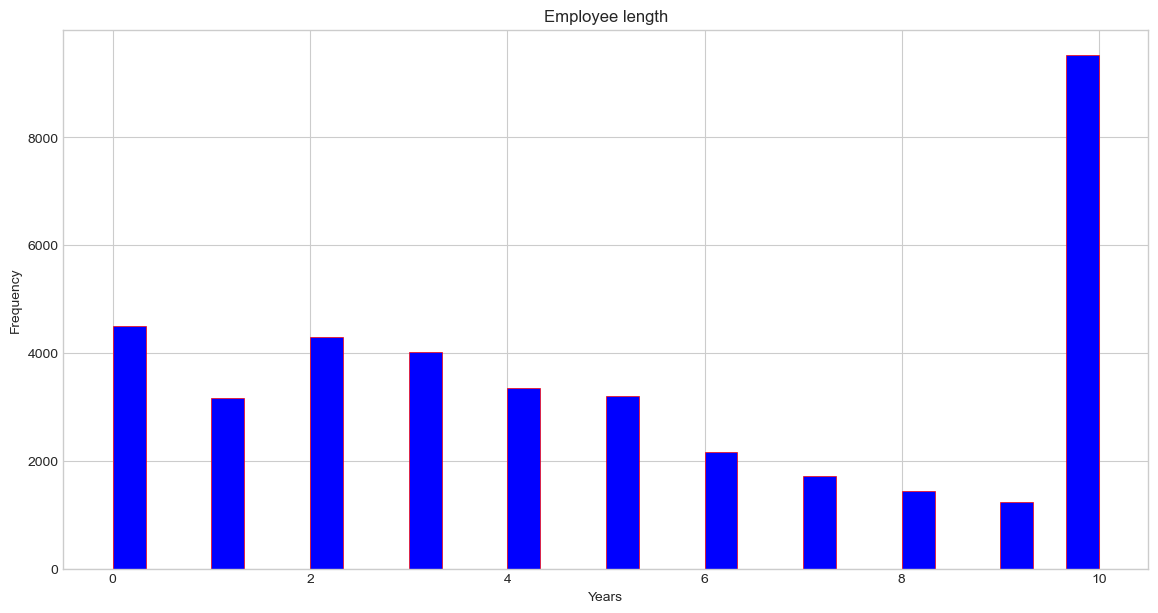

In [75]:
#plotting a histogram to see the frequency distribution of employee length
# Make it 14x7 inch
plt.figure(figsize=(14,7)) 
# nice and clean grid
plt.style.use('seaborn-whitegrid') 
plt.hist(loan['emp_length'],bins=30, facecolor = 'blue', ec="red", linewidth=0.5)
plt.title('Employee length') 
plt.xlabel('Years') 
plt.ylabel('Frequency') 
plt.show()
plt.style.use('default')

#### Observation:
    1. The people with experience 10+ years are taking more loan.
    2. Another observation is that second highest is people with less than 1 year experience.
#### Take away:
    1. Planning to analyze if emp_length column contributes the defaulters. 

### Quantitative variables


#### Handling the outliers in annual_inc column

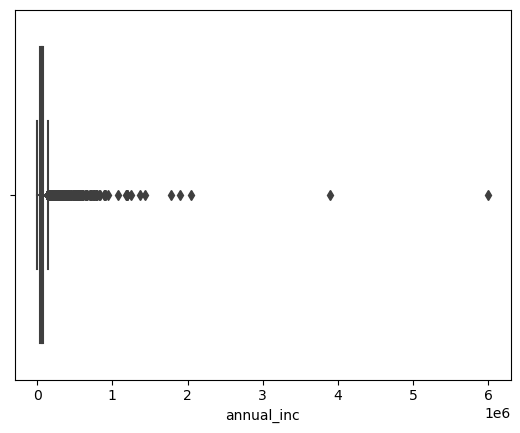

In [76]:
#Create a box plot for the price column
sns.boxplot(data=loan, x='annual_inc')
plt.show()

#### Take away :
    The deviation of outliers in annual_inc field has large gap which could impact the analysis. Hence we will be cutting 
    off data above 95%.
    

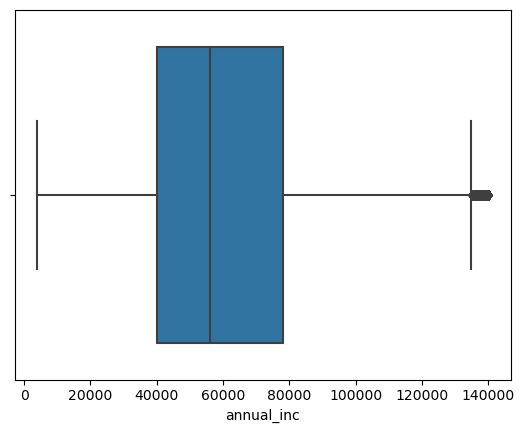

In [77]:
#Analysing the annual_inc after removing outliers
loan = loan[loan['annual_inc'] <= loan['annual_inc'].quantile(0.95)]
sns.boxplot(data=loan, x='annual_inc')
plt.show()

Now we can see outliers do not have larger gap.

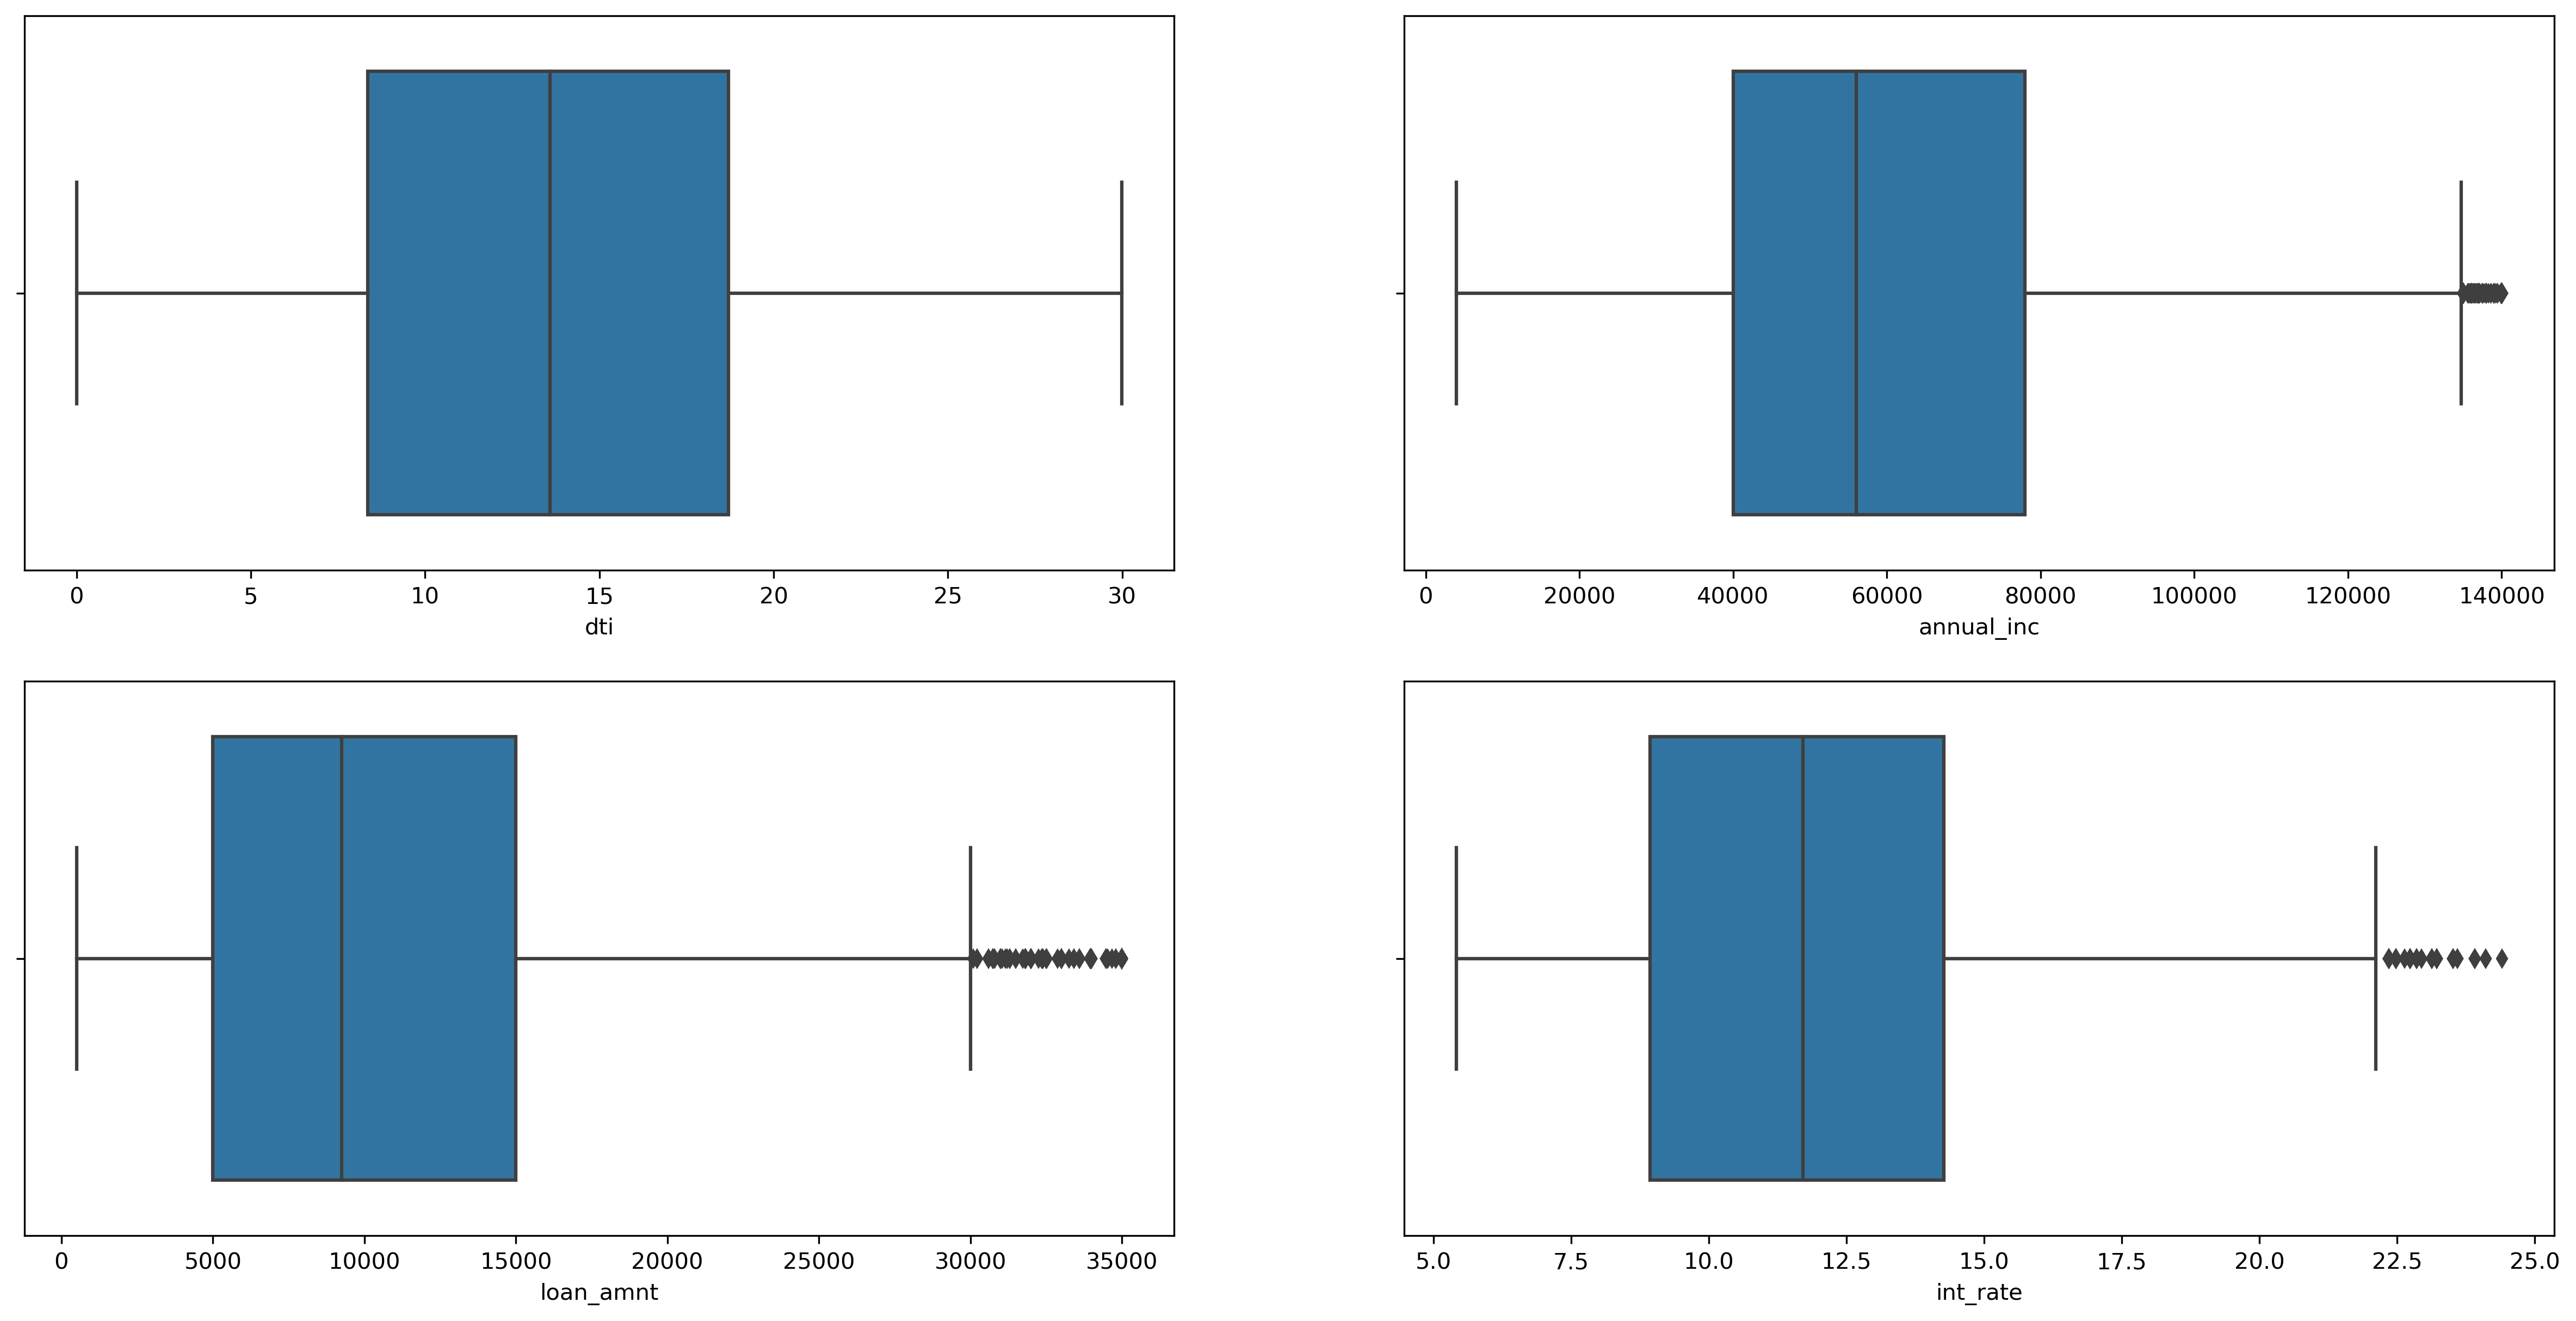

In [78]:
# Box plot for below mentioned numerical columns
features = ['dti', 'annual_inc', 'loan_amnt', 'int_rate']
# The bellow loop will plot box plot for each value provided in features list. 
plt.figure(figsize = (20, 15), dpi=300)
for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], data = loan)
plt.show()

The above plots shows the distribution of 'dti', 'annual_inc', 'loan_amnt', 'int_rate' variables

#### Deriving variables from existing columns 
    Extracting the month and year from issue_d column to visualise the frequency distribution of loans based on issue month and year.

In [79]:
#The isssue_month and issue_year is derived from issue_d column
loan['issue_month'] = loan.issue_d.apply(lambda x: x.split('-')[0])
loan['issue_year'] = loan.issue_d.apply(lambda x: '20' + x.split('-')[1])

Text(0.5, 1.0, 'Distribution across years')

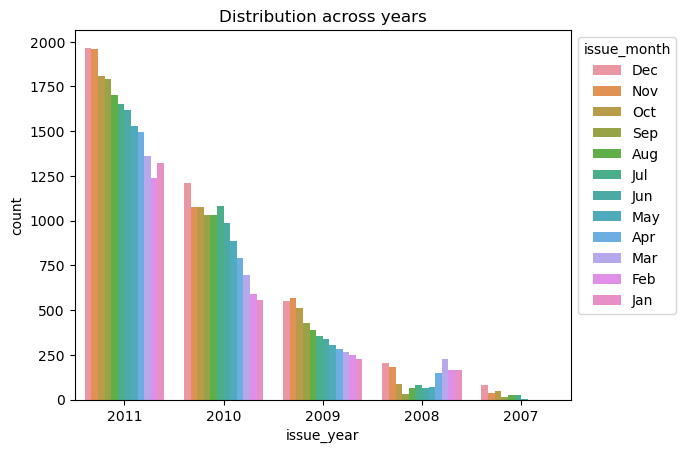

In [80]:
#plot countplot with issue_year hueed by issue_month to find the distribution of each year and month
ax = sns.countplot(x='issue_year', hue='issue_month', data=loan)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Distribution across years")

##### Observation:
    1. The number of people taking loan is increasing each year with maximum december 2011.
    2. The number of people taking loan is increases every year and peaks in november or december.

#### Create bins for converting numerical to categorical for visualisation

In [81]:
#creating bins for int_rate,open_acc,revol_util,total_acc
loan['int_rate_groups'] = pd.cut(loan['int_rate'], bins=5,precision =0,labels=['5%-10%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan['open_acc_groups'] = pd.cut(loan['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan['revol_util_groups'] = pd.cut(loan['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan['total_acc_groups'] = pd.cut(loan['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan['annual_inc_groups'] = pd.cut(loan['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
loan['loan_amnt_groups'] = pd.cut(loan['loan_amnt'], bins=7,precision =0,labels=['0-5k','6k-10k','11k-15k','16k-20k','21k-25k','25k-30k','31k-35k'])


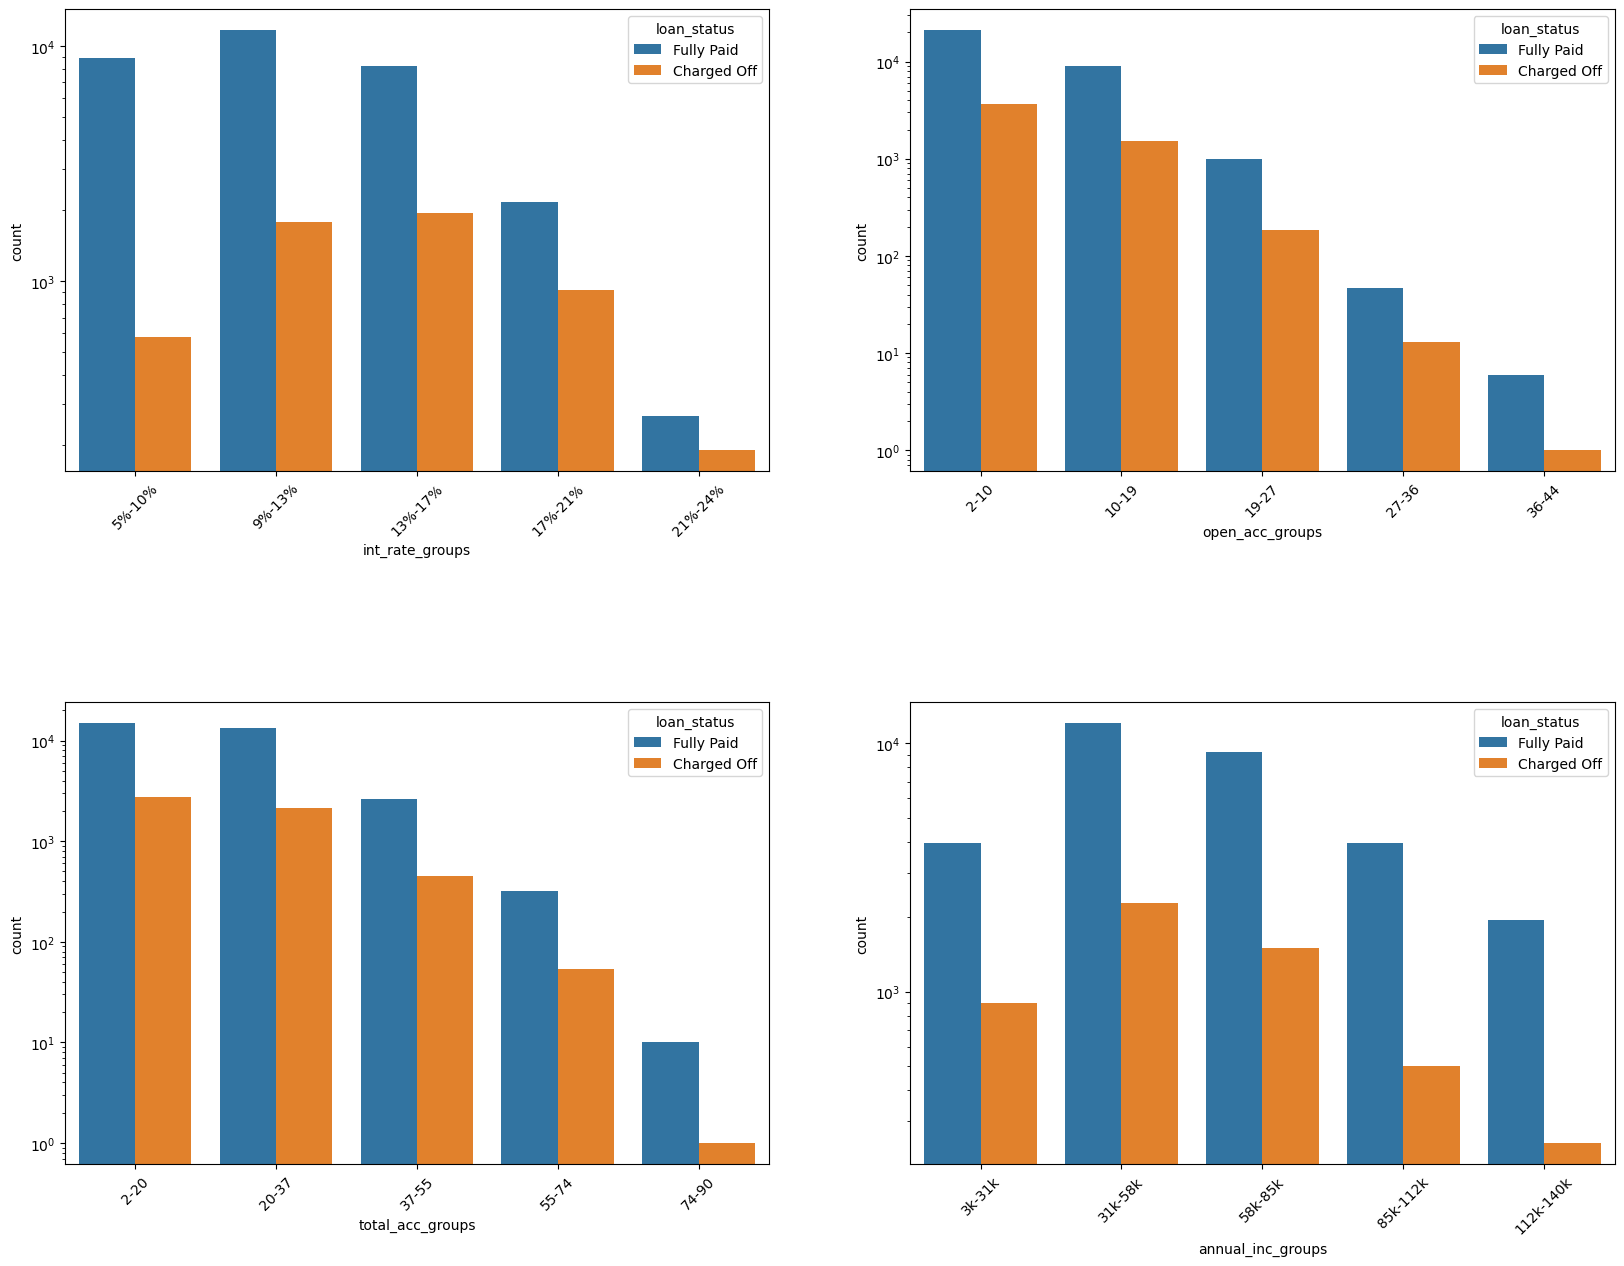

In [82]:
#plotting all newly created categorical variable using binning
features = ['int_rate_groups', 'open_acc_groups', 'total_acc_groups','annual_inc_groups' ]
plt.figure(figsize = (20, 15))
#the bellow loop will plot count plot for analysis.
for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'loan_status', data = loan)
    
    plt.rcParams['axes.titlesize'] = 16
    
    plt.xticks(rotation = 45)
    plt.yscale('log')

The above charts are ploted to visualize the created categorical variables through binning.
#### Observation
    1. In int_rate of charging off is less incase of interest rate 21-24% 
    2. The frequency of fully paid trends high when interest rate is between 9-13%.
    3. The interest rate 17-21% has a high probablity of getting defaulted.
    4. In annual_inc groups people with 112k - 140k has higher chance of paying loan fully.
    5. The annual_inc group with 31k-58k has higher percentage of getting charged off.

## Summary of univariate analysis

- Year end has more applicants for loan than year start
- Rent and Mortgage house holders are seeking for loan more than own house people
- People above 10+years seeks loan more than lower experienced 
- Removed outliers in Annual income field to get proper distribution of data.
- Annual income of 50K is the median of people who needs loan 
- In int_rate charging off is less incase of interest rate 21-24% but the total people taken 21-24% is less
- If we see the total proportion in intrest rate 9-13% interest rate has increased chance of being fully paid.
- The interest rate 13-17% high percentage of getting charged off.
- In annual_inc groups people with 112k - 140k has less percentage of getting charged off.
- The annual_inc group with 31k-58k has higher percentage of getting charged off.



# Bi variate analysis

### What are we planning to acheive
-  We need to find out if the reason for people charging off the loan depends on their home ownership status.  
-  We could find some reason for people not paying the loan when we do bivariate analysis on loan_status column. 
-  Planning to analyze if emp_length column plays any role in people not paying the loan. 
-  We will analyse the purpose column against the loan_status column in order to find insights on the pupose that leads to the large amount of defaulters
-  We will also study the impact of verification status on loan repayment

### *Plotting heatmap to find if there is any correlation between variables in loan dataset*

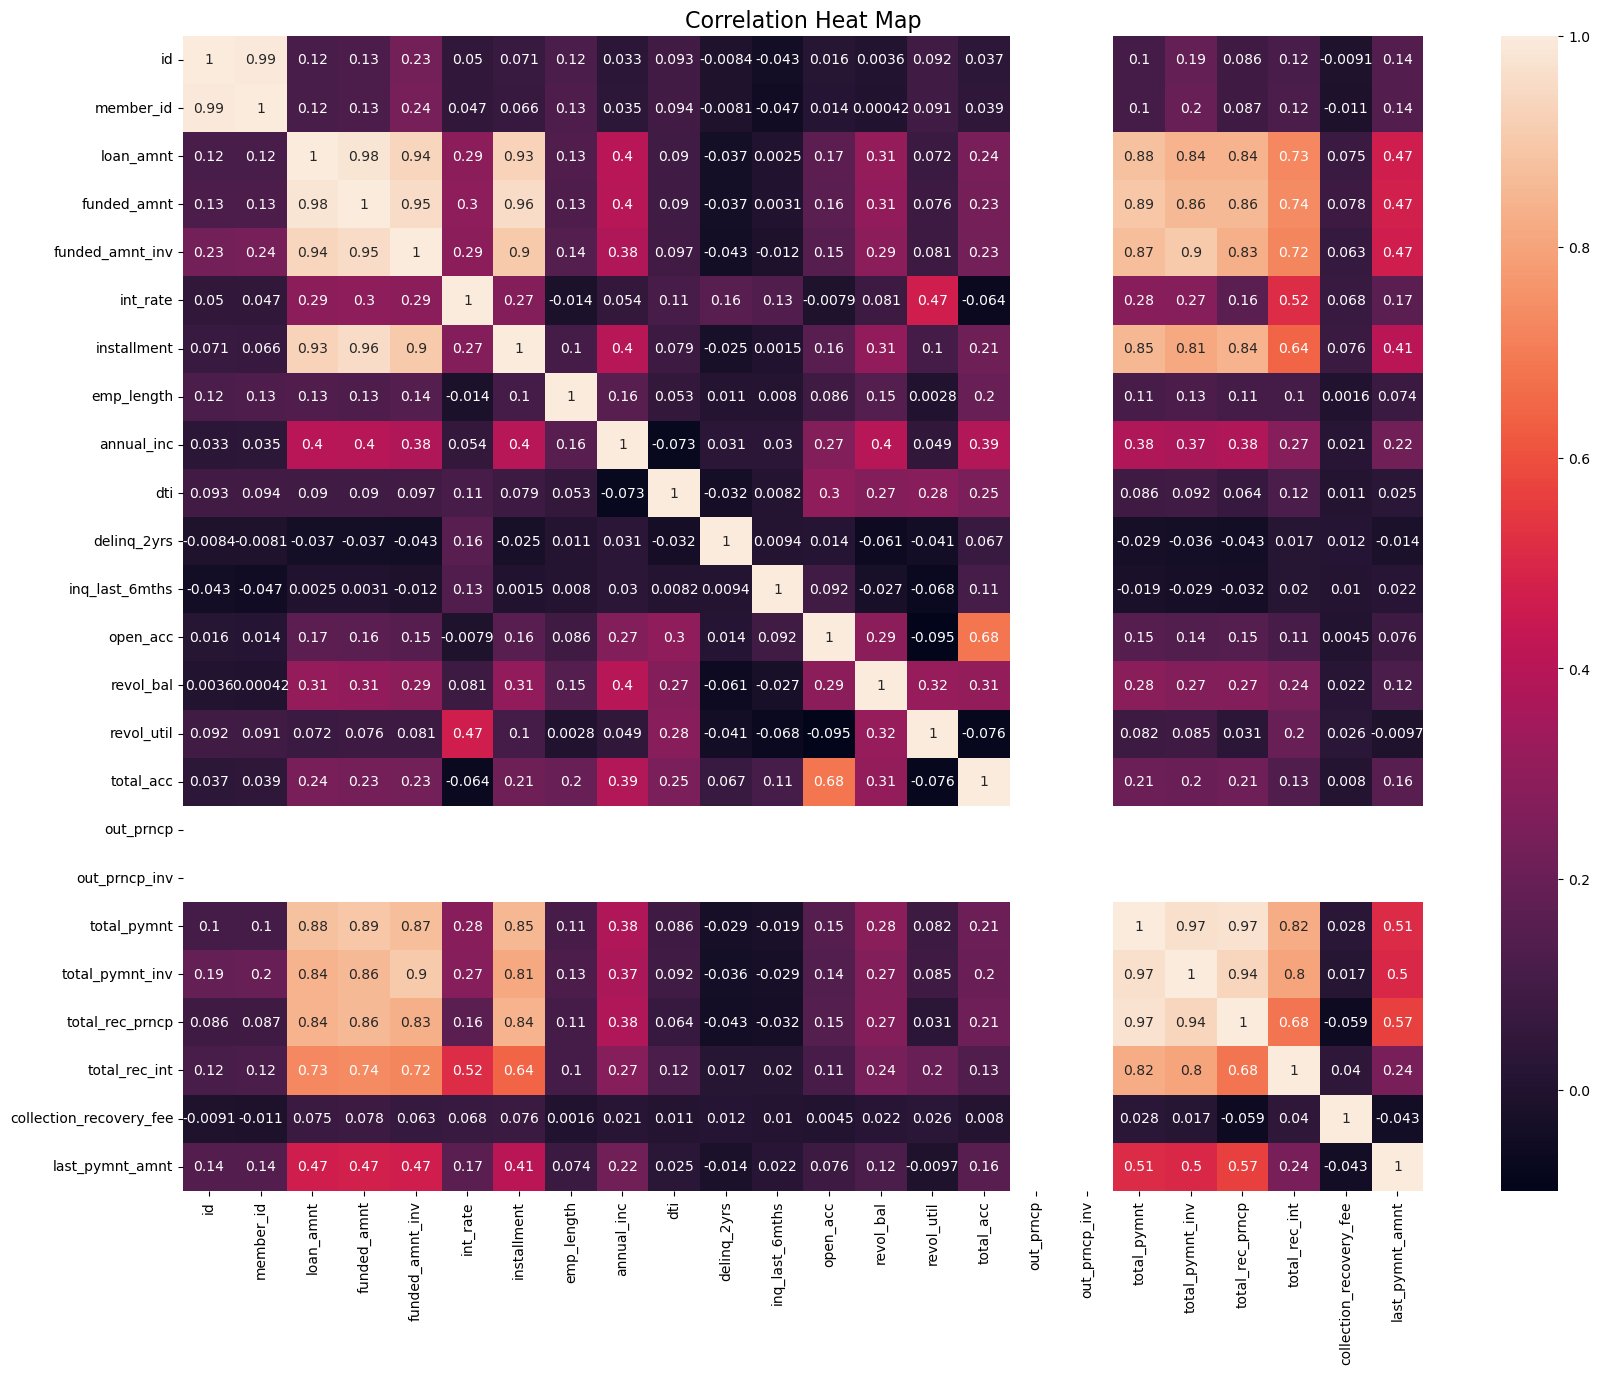

In [83]:
# calculate the correlation matrix
corr = loan.corr()

plt.subplots(figsize=(20,15))
             
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
            annot=True)

plt.title("Correlation Heat Map")
plt.show()

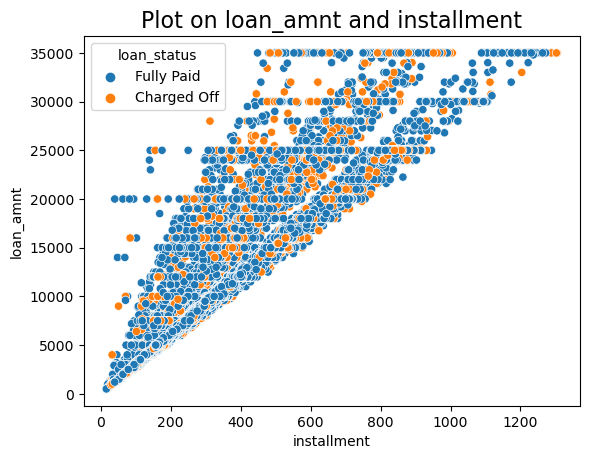

In [84]:
# plotting a scatterplot of loan_amnt vs installment with hued by loan_status
plt.title("Plot on loan_amnt and installment")
sns.scatterplot(data=loan, x='installment', y='loan_amnt', hue=loan['loan_status'])
plt.show()

#### Observation
    1. The above scatter plot shows the high correlation between loan_amnt and installment

In [85]:
# Convert loan status to binary column for the ease of plotting
loan['loan_status_binary'] = np.where(loan['loan_status'] == 'Fully Paid', '1', '0')

In [86]:
# Convert the data type to numeric 
loan['loan_status_binary'] = pd.to_numeric(loan['loan_status_binary'])

In [87]:
loan['loan_status_binary'].nunique()

2

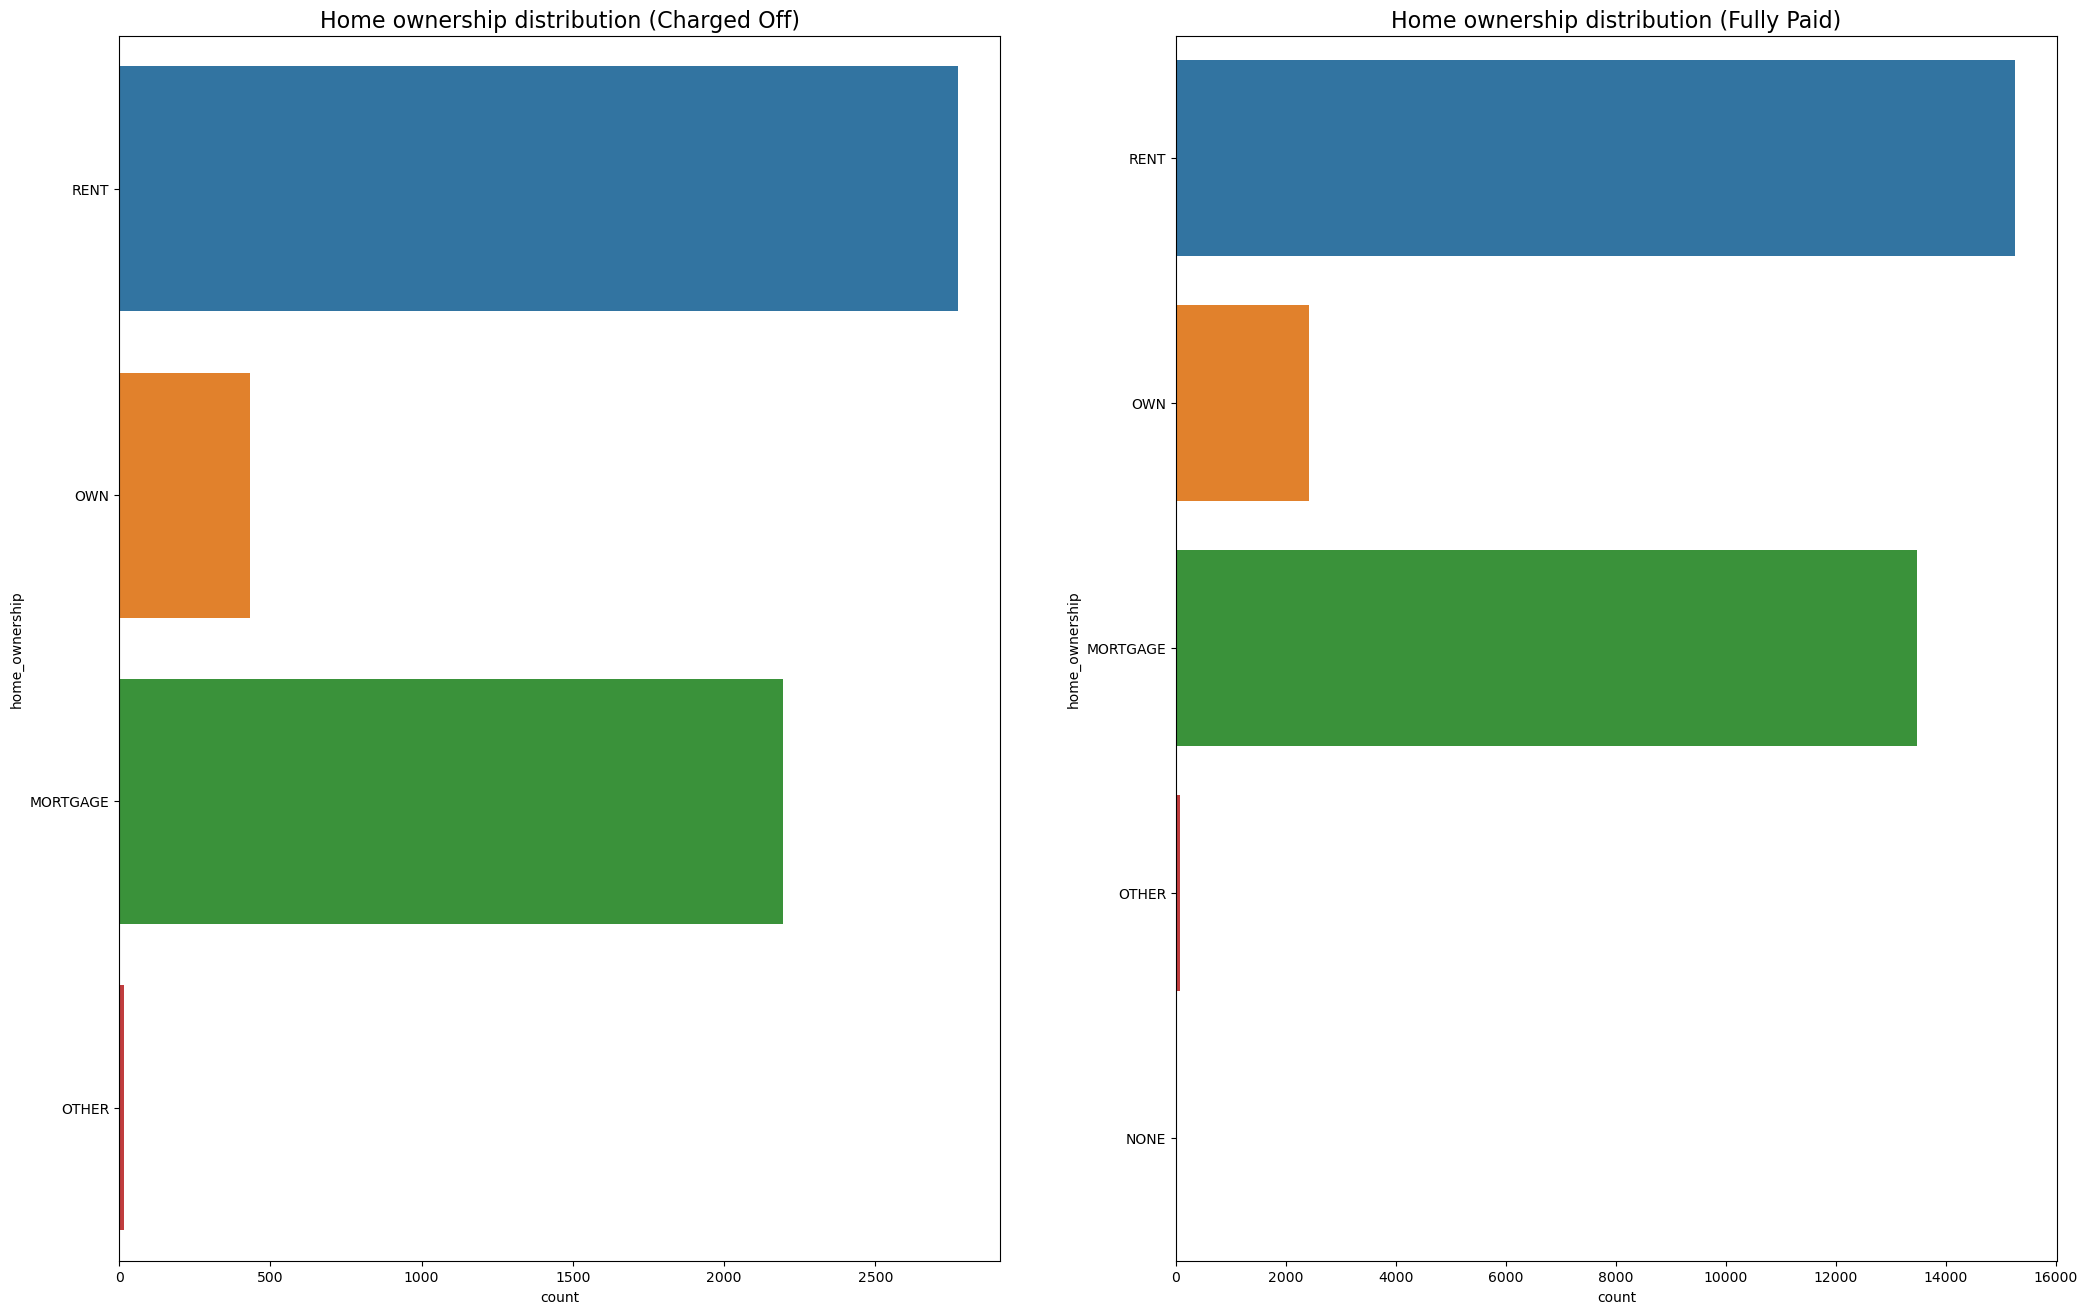

In [88]:
#declaring a figure to do subplotting
plt.figure(figsize=(25,35))

plt.subplot(221)
# Plotting a countplots of home_ownership segmented by loan_status charged off
plt.title("Home ownership distribution (Charged Off)") 
sns.countplot(y='home_ownership', data=loan[loan['loan_status']=='Charged Off'])

plt.subplot(222)
# Plotting a countplots of home_ownership segmented by loan_status fully paid
plt.title("Home ownership distribution (Fully Paid)")
sns.countplot(y='home_ownership', data=loan[loan['loan_status']=='Fully Paid'])
plt.show()

#### Observation
    1. The people who are staying in rented house or having house in mortgage are charging off loan more.


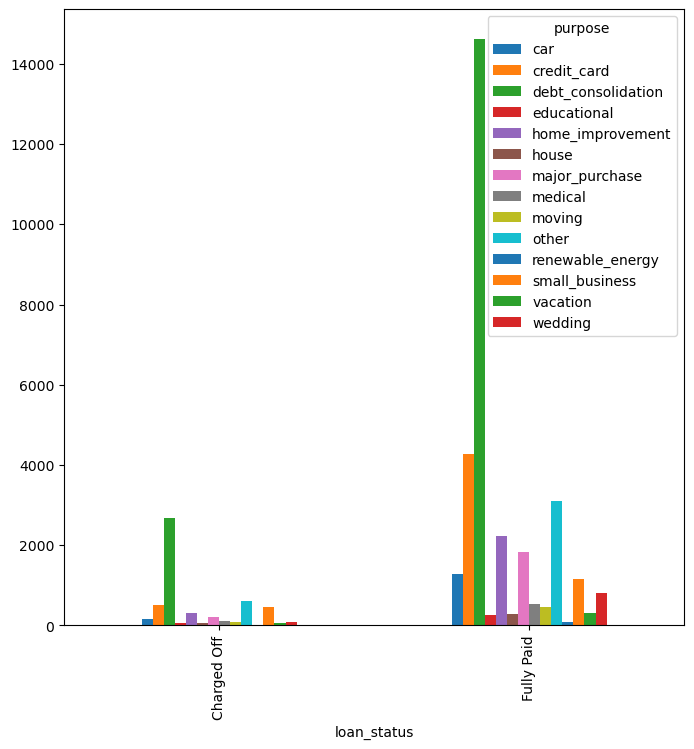

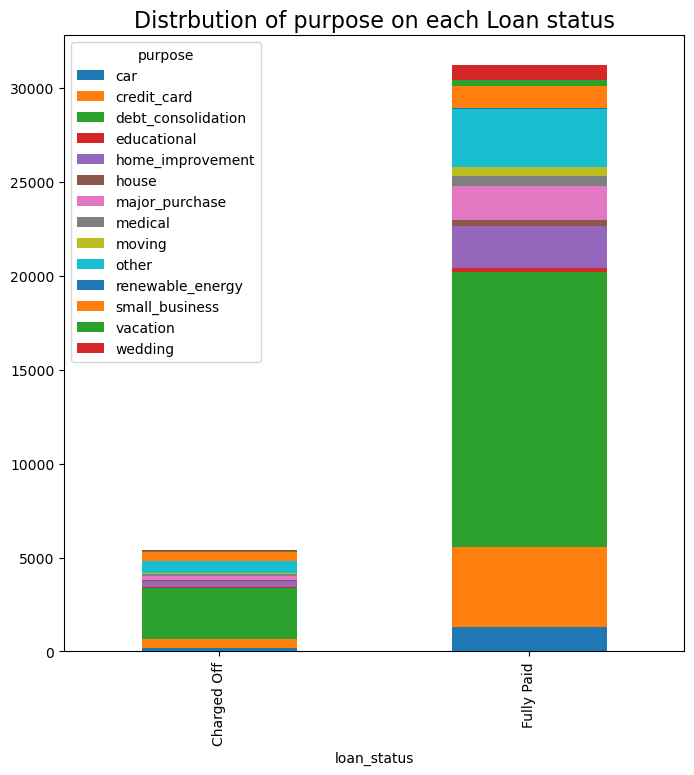

In [111]:
#Creating a new dataframe by comparing loan_status and purpose.
purpose_crosstab = pd.crosstab(index=loan["loan_status"], 
                          columns=loan["purpose"])
purpose_crosstab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)

purpose_crosstab = pd.crosstab(index=loan["loan_status"], 
                          columns=loan["purpose"])
purpose_crosstab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)
plt.title("Distrbution of purpose on each Loan status")
plt.show()

#### Observation
    1. The Debt_consolidation has has greater chance of getting charged off and fully paid. 

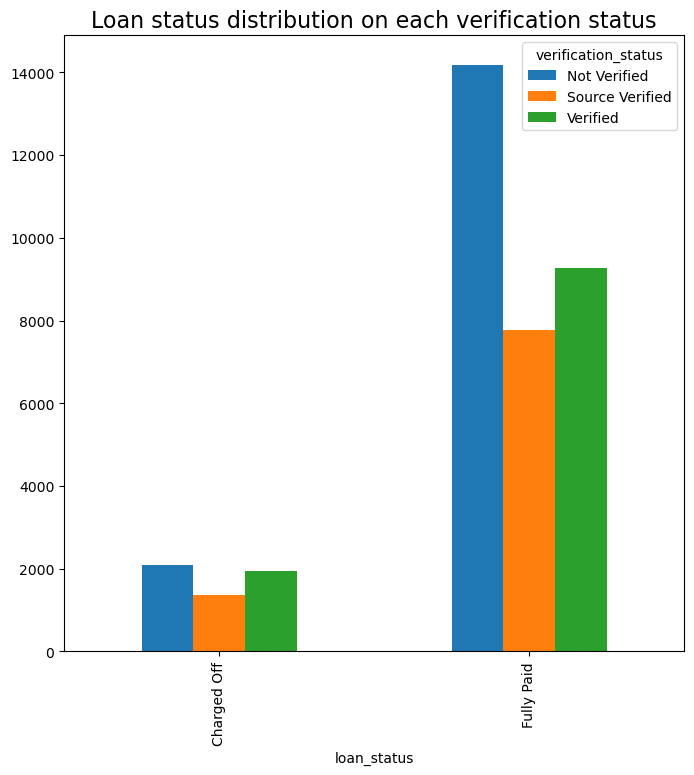

In [90]:
#Creating a new dataframe by plotting against loan_status and Verification_status using crosstab function.
verification_crosstab = pd.crosstab(index=loan["loan_status"], 
                          columns=loan["verification_status"])
verification_crosstab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False )
plt.title("Loan status distribution on each verification status")
plt.show()

#### Observation
    1. We could see a similar trend of not verified being higher count in both charged off and fully paid loan status.
    

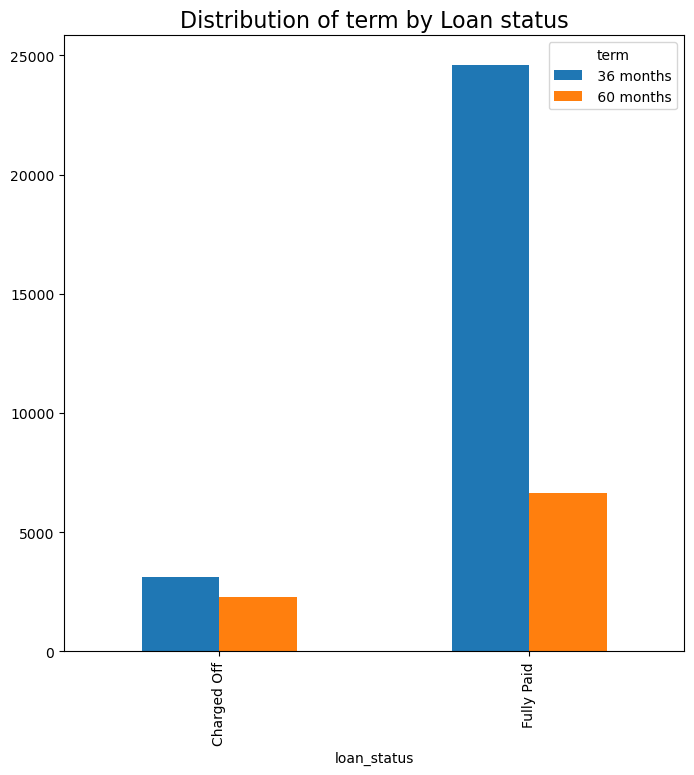

In [91]:
#creating a datafrome using crosstab to plot against loan status and term
term_crosstab = pd.crosstab(index=loan["loan_status"], 
                          columns=loan["term"])
term_crosstab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False )
plt.title("Distribution of term by Loan status")
plt.show()

#### Observation
    1. There is a similar trend of loans with term 36 months has relatively higher percentage in both loan status.

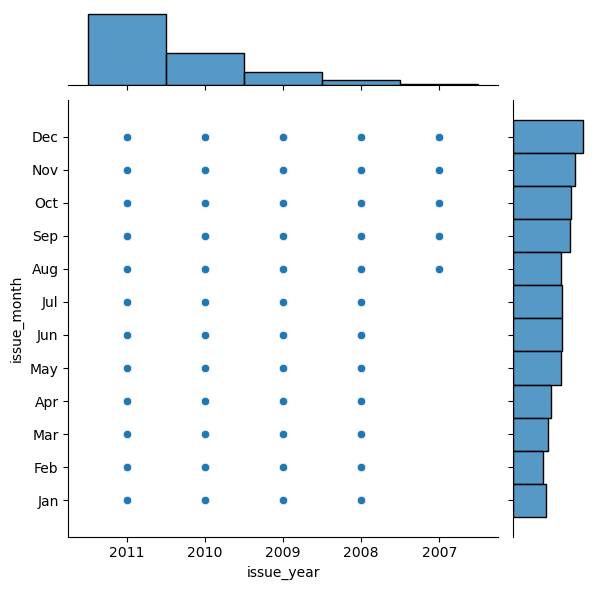

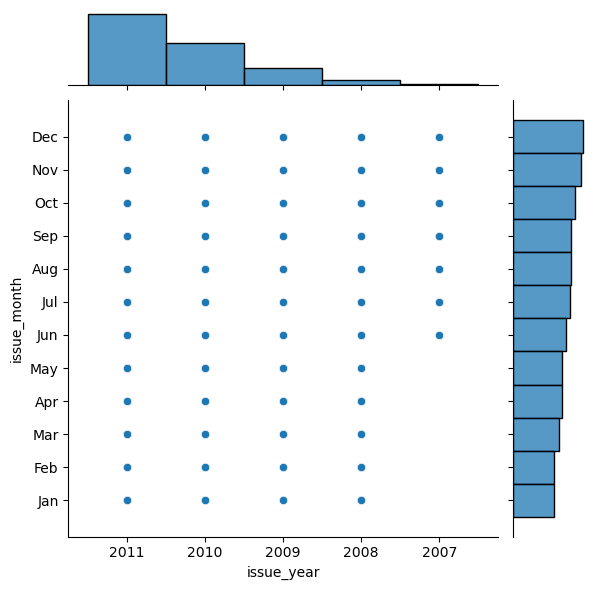

In [92]:
#joint plot of issue_year and issue_month for each loan status
sns.jointplot(data = loan[loan['loan_status'] == 'Charged Off'], x = 'issue_year', y = 'issue_month');
sns.jointplot(data = loan[loan['loan_status'] == 'Fully Paid'], x = 'issue_year', y = 'issue_month');
plt.show()

#### Observation
    1. The above plots show that there same trend in both the case that high number of loans was taken in 2011 december. This could be due to inflation in US at 2011.                                             

Text(0.5, 1.0, 'Distribution based on grades (Fully Paid)')

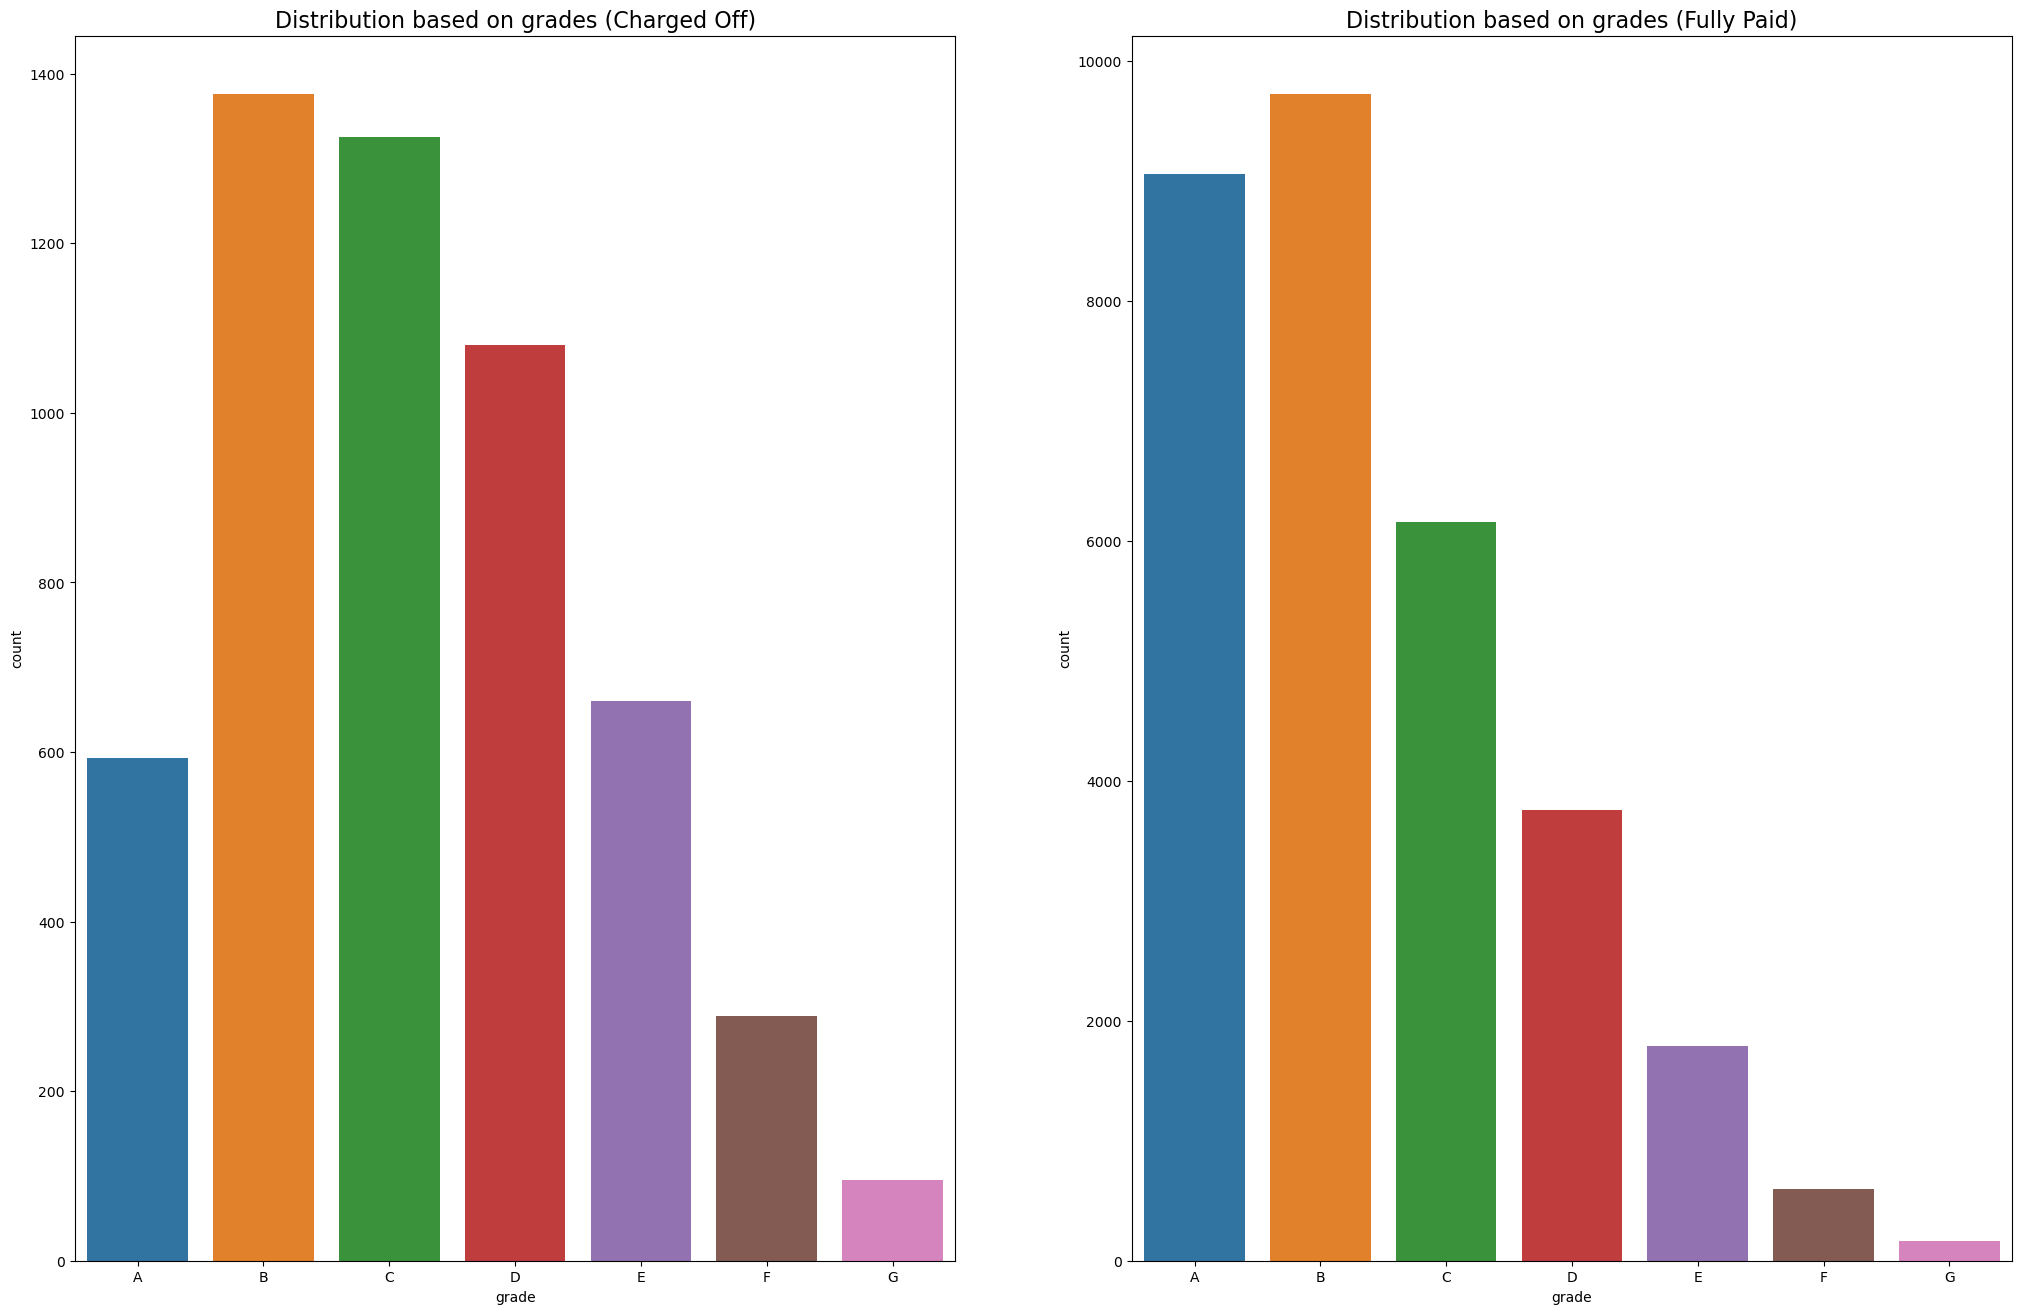

In [93]:
#declaring a figure to do subplotting.
plt.figure(figsize=(25,35))

#subplot 221
plt.subplot(221)
#Plotting ou
ordered_grade = ['A','B','C','D','E','F','G']
ax = sns.countplot(x='grade', data=loan[loan['loan_status'] == 'Charged Off'], order=ordered_grade)
plt.title("Distribution based on grades (Charged Off)")

#subplot 222
plt.subplot(222)
#add comment
ordered_grade = ['A','B','C','D','E','F','G']
ax = sns.countplot(x='grade', data=loan[loan['loan_status'] == 'Fully Paid'], order=ordered_grade)
plt.title("Distribution based on grades (Fully Paid)")

#### Observation
    1. We could see the Grade B has higher count in both charged off and fully paid
    2. We might get some insights if we analyse the percentage of fully paid and charged off

Text(0.5, 1.0, 'Distribution based on grades and sub grades (Fully Paid)')

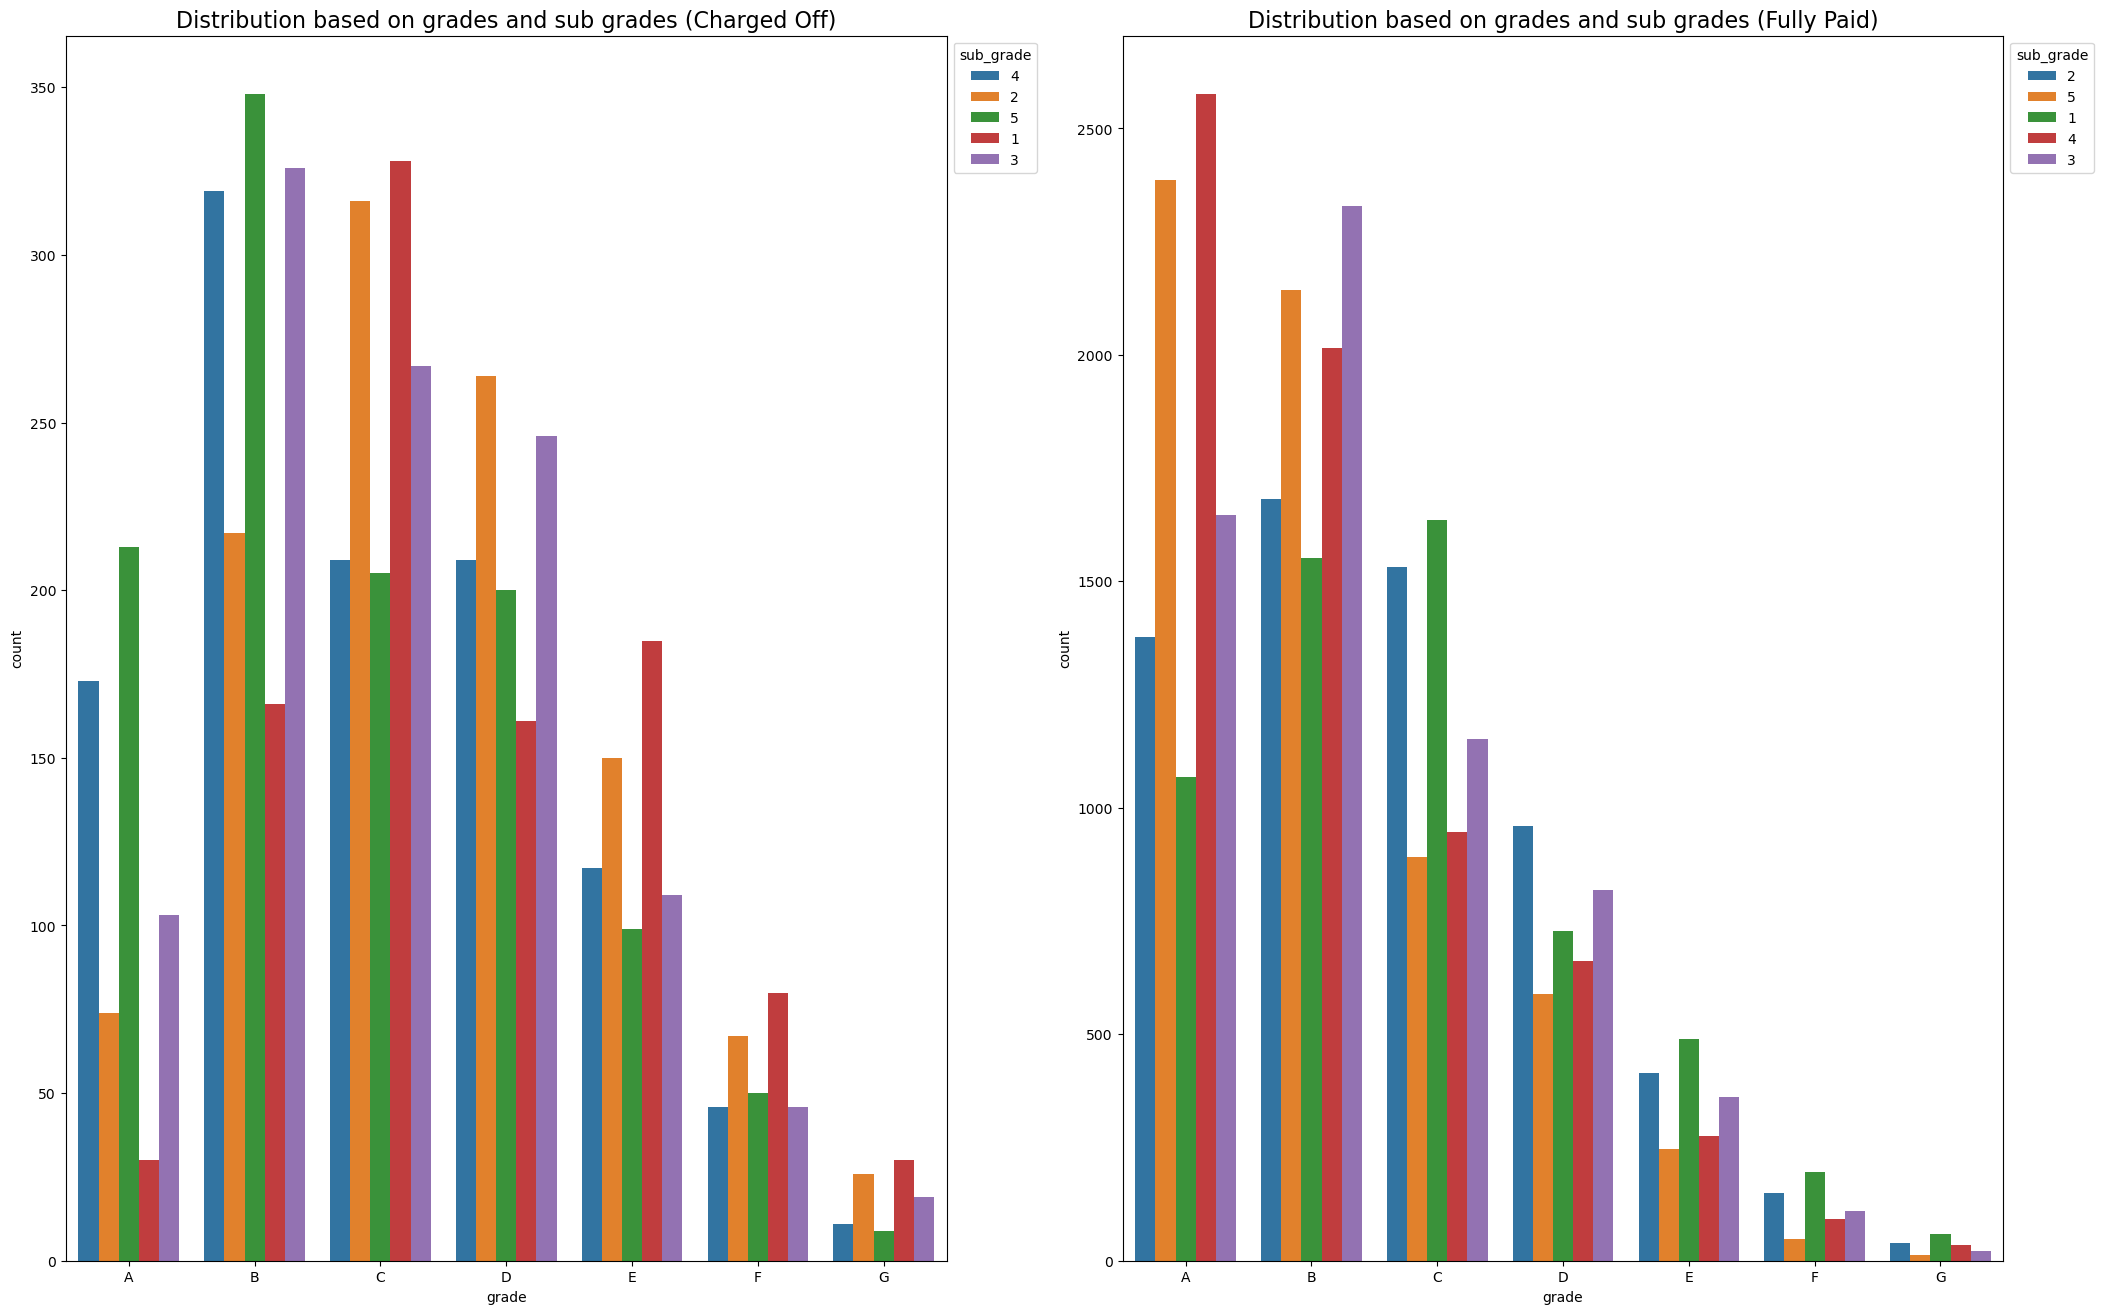

In [94]:
#Creating plt object with fig size 25,35
plt.figure(figsize=(25,35))


#creating a subplot
plt.subplot(221)
#order_grade varible is used to store the x axis scale 
ordered_grade = ['A','B','C','D','E','F','G']
#plotting a countplot of grade hueed by subgrade of loan dataframe subset (Charged Off)
ax = sns.countplot(x='grade', hue='sub_grade', data=loan[loan['loan_status'] == 'Charged Off'], order=ordered_grade)
#moving the legend 
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Distribution based on grades and sub grades (Charged Off)")

#creating a subplot
plt.subplot(222)
#plotting a countplot of grade hueed by subgrade of loan dataframe subset (Charged Off)
ax = sns.countplot(x='grade', hue='sub_grade', data=loan[loan['loan_status'] == 'Fully Paid'], order=ordered_grade)
#moving the legend 
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Distribution based on grades and sub grades (Fully Paid)")
            

#### Findings
    1. The Sub Grade A4 has the highest percentage of fully paid
    2. The Sub Grade B5 has the highest percentage of Charged off

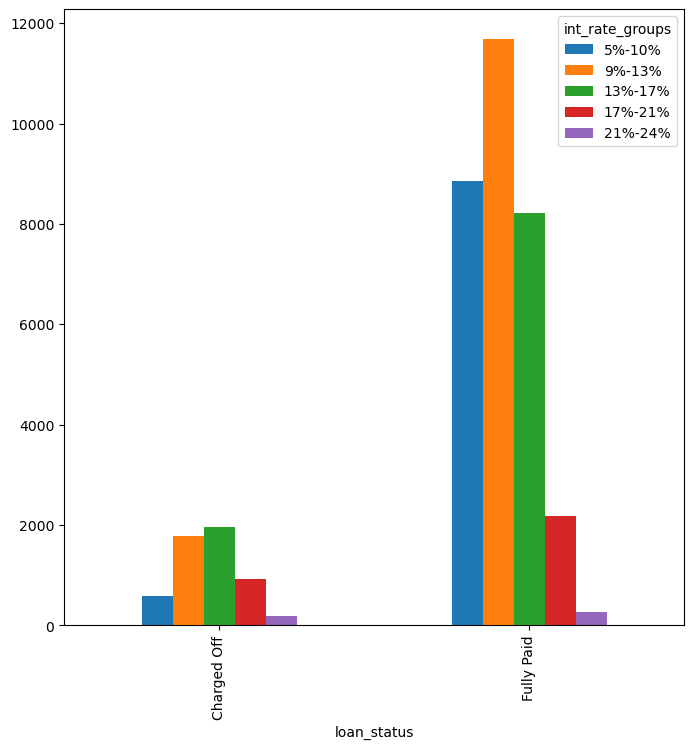

In [95]:
# crosstab function is used to create derived table by plotting against loan_status and int_rate_groups
int_crosstab = pd.crosstab(index=loan["loan_status"], 
                          columns=loan["int_rate_groups"])

# Plotting the created dataframe 
int_crosstab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False )

# displaying the plot
plt.show()

#### Observation
    1. The interest rate 13-17 % has slight increase in charged off percentage
    2. The interest rate 9-13% has a higher chance of getting paid.


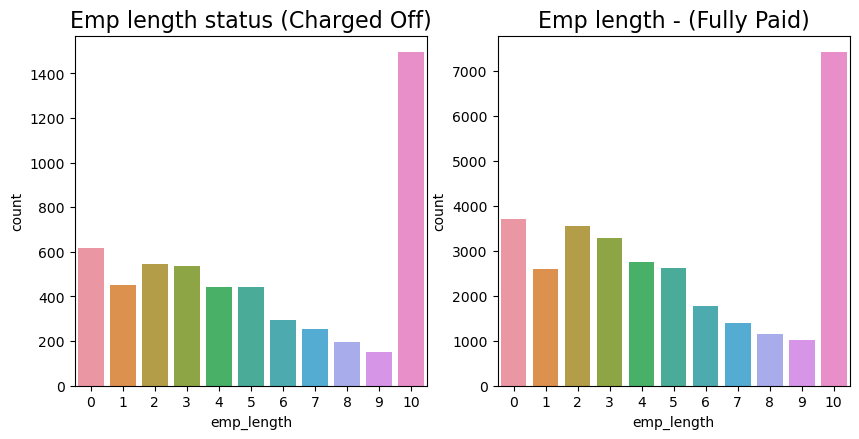

In [96]:
#defining a figure plot 
plt.figure(figsize=(10,10))

#creating 1st subplots
plt.subplot(221)
plt.title('Emp length status (Charged Off)')
#plotting a countplot of emp_length filltered by charged off
sns.countplot(x='emp_length', data=loan[loan.loan_status == 'Charged Off'])

#creating 2nd subplot
plt.subplot(222)
plt.title('Emp length - (Fully Paid)')
#plotting a countplot of emp_length filltered by fully paid
sns.countplot(x='emp_length', data=loan[loan.loan_status == 'Fully Paid'])

#display the plots
plt.show()

#### Observation
    1. The person with experience 10 + years have fully paid more at the same time they also have higher percentage of paying fully

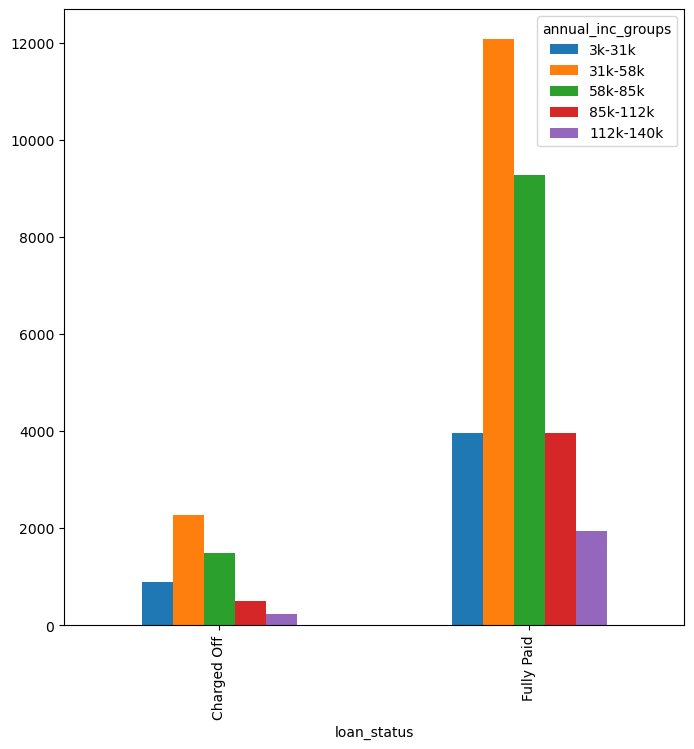

In [97]:
#crosstab function is used to create derived table by plotting against loan_status and annual_inc_groups
annual_inc_crosstab = pd.crosstab(index=loan["loan_status"], 
                          columns=loan["annual_inc_groups"])

#plotting a countplot of emp_length filltered by charged off
annual_inc_crosstab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False )

#displaying the plots
plt.show()

#### Observation
    1. The income group 31k - 58k has high percentage in both fully paid and charged off loan status.
    2. The income group 112k - 140k has less charged off count. Could be due to their high income.
    

## Bi variate analysis summary


#### Below are the probable defaulters reasons 

- Higher the interest rate as higher (13-17%) interest range has high defaulters
- Debt consolidation stands out in the defaulters loan where it could be borrowers took a loan to clsoe existing loan but failed again 
- We can clearly see during the year 2011 end there are more defaulters which is directly correlating to recession in U.S hence market situation based loan approvals would solve most of these. 
- Employees with 10+ years has more probability of being a defaulter 
- Employees with annual income range 31k-58k has more probability of being a defaulter
- The people who are marked as grade G has higher chance of getting charged off
- The Sub Grade B5 has the highest percentage of Charged off

#### Good candidates for providing loan which is inveserly proportional to defaulters

- Obviously, lesser interest rate helps borrowers repay the loan without fail 
- People who owns a house have good records of closing the committed loan amount
- The grade B has higher chance of getting fully paid
- The interest rate 9-13% has a higher chance of getting paid.
- The Sub Grade A4 has the highest percentage of fully paid
- The income group 112k - 140k has less charged off count. Could be due to their high income.

## Multivariate analysis 

##### What we will be doing ?

- we will apply a third or more variables to above bivariate charts and derive insights 
- There are scope to find the influence of third variable on top of the two variables 

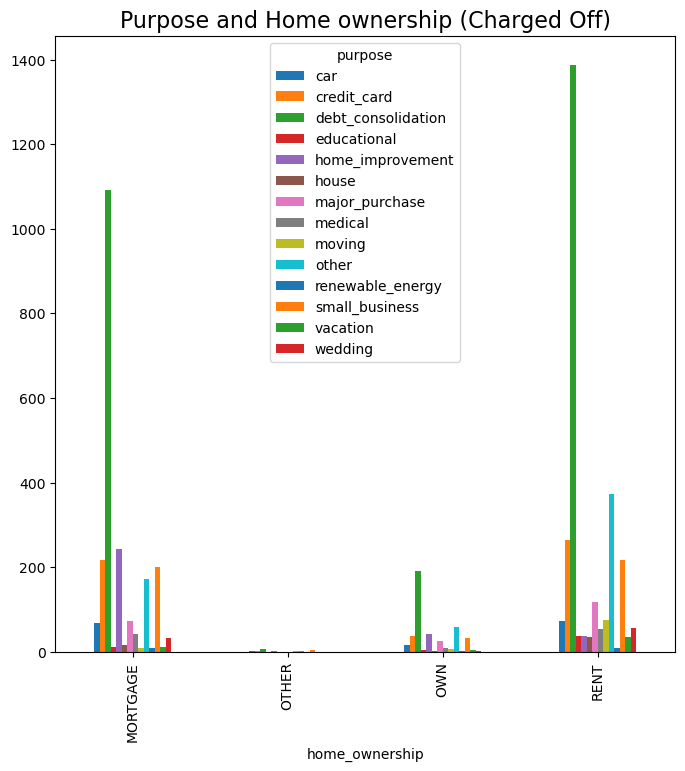

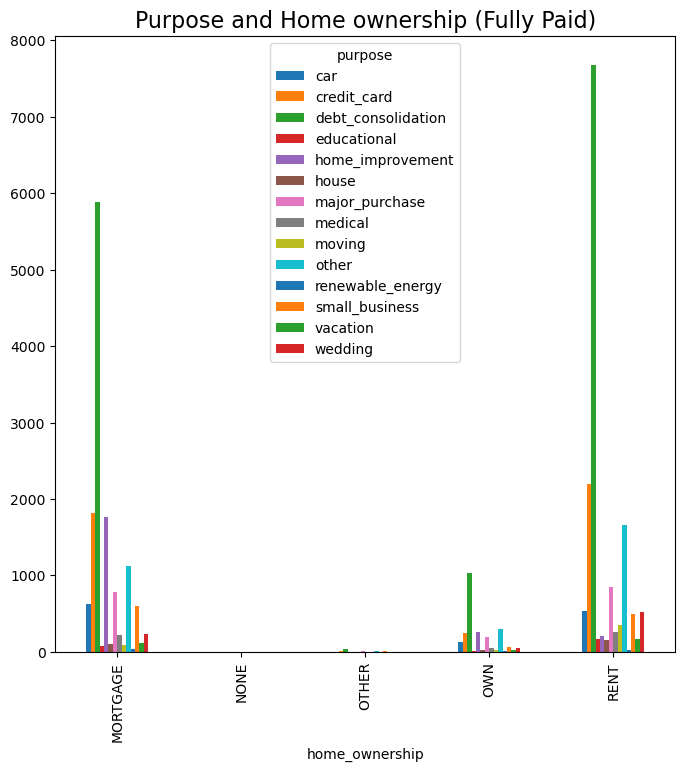

In [98]:
#plot 1 (loan status charged off)
#crosstab function is used to create derived table by plotting against home ownership and purpose
term_crosstab = pd.crosstab(index=loan[loan['loan_status']=='Charged Off']['home_ownership'], 
                          columns=loan['purpose'])
#plotting a bar plot of the created crosstab dataframe
term_crosstab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)
#Title of the chart
plt.title('Purpose and Home ownership (Charged Off)')

#plot 2 (loan_status fully paid)
#crosstab function is used to create derived table by plotting against home ownership and purpose
term_crosstab = pd.crosstab(index=loan[loan['loan_status']=='Fully Paid']['home_ownership'], 
                          columns=loan['purpose'])
#plotting a bar plot of the created crosstab dataframe
term_crosstab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)
#title of the chart
plt.title('Purpose and Home ownership (Fully Paid)')
#displaying the plots
plt.show()

#### Observation
    1. The people who are buying loan for debt consolidation with home ownership has rent or mortgage has higher chance of getting charged off

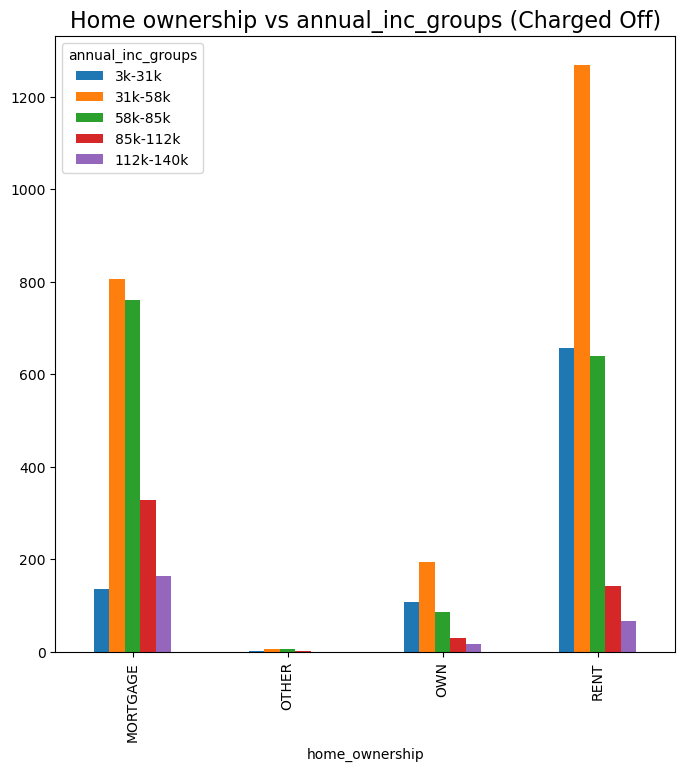

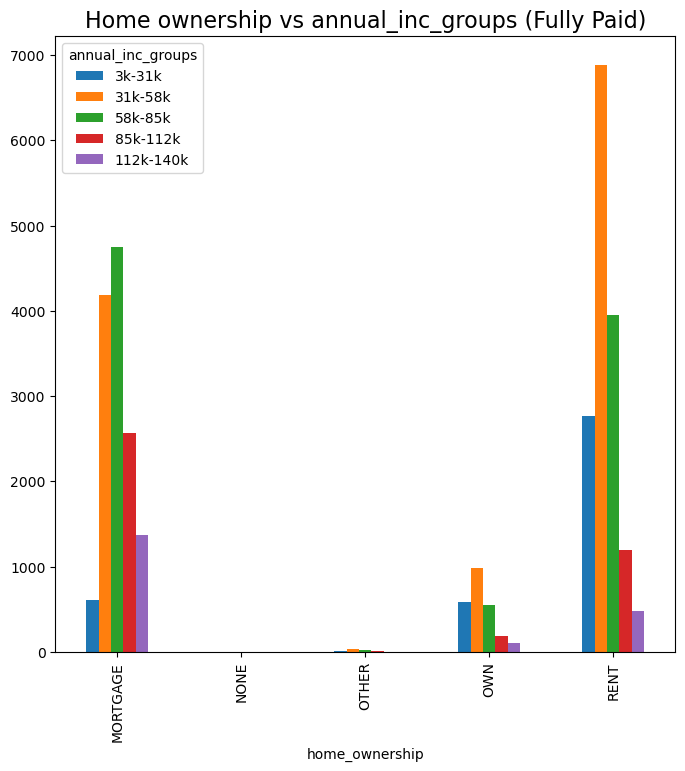

In [99]:
#plot 1 loan status - charged off
#crosstab function is used to create derived table by plotting home ownership against and annual_inc_groups
annual_inc_crosstab = pd.crosstab(index=loan[loan['loan_status']=='Charged Off']['home_ownership'], 
                          columns=loan['annual_inc_groups'])
#plotting a bar plot of the created crosstab dataframe
annual_inc_crosstab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)
#title of the chart
plt.title('Home ownership vs annual_inc_groups (Charged Off)')

#plot 1 loan status - charged off
#crosstab function is used to create derived table by plotting home ownership against and annual_inc_groups
annual_inc_crosstab = pd.crosstab(index=loan[loan['loan_status']=='Fully Paid']['home_ownership'], 
                          columns=loan['annual_inc_groups'])
#plotting a bar plot of the created crosstab dataframe
annual_inc_crosstab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)
#title of the plot
plt.title('Home ownership vs annual_inc_groups (Fully Paid)')
plt.show()

#### Observation
    1. The People in 31k - 58 k income group with a own house has higher chance of paying the loan
    2. The People in 31k - 58 k income group with house in mortgage or living in a rented house has higher chance of defaulting the loan

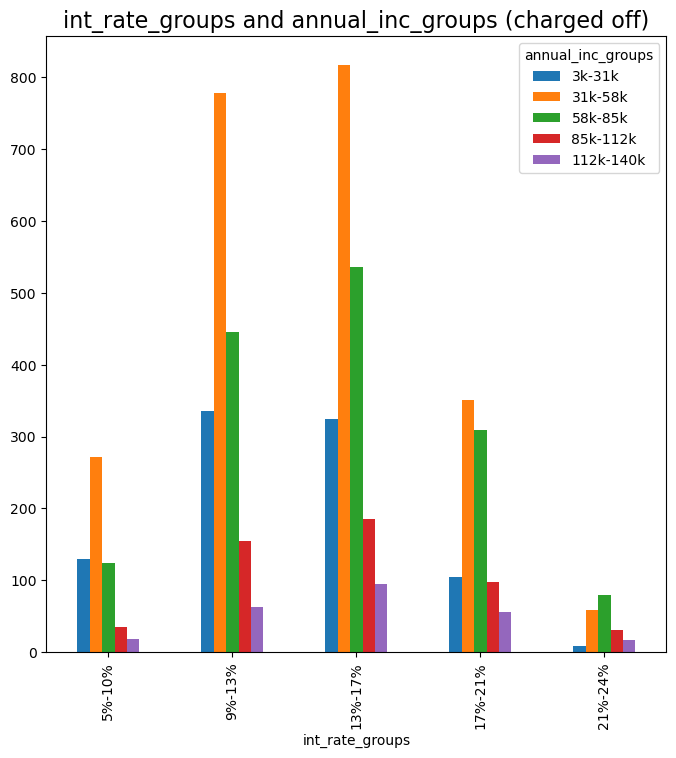

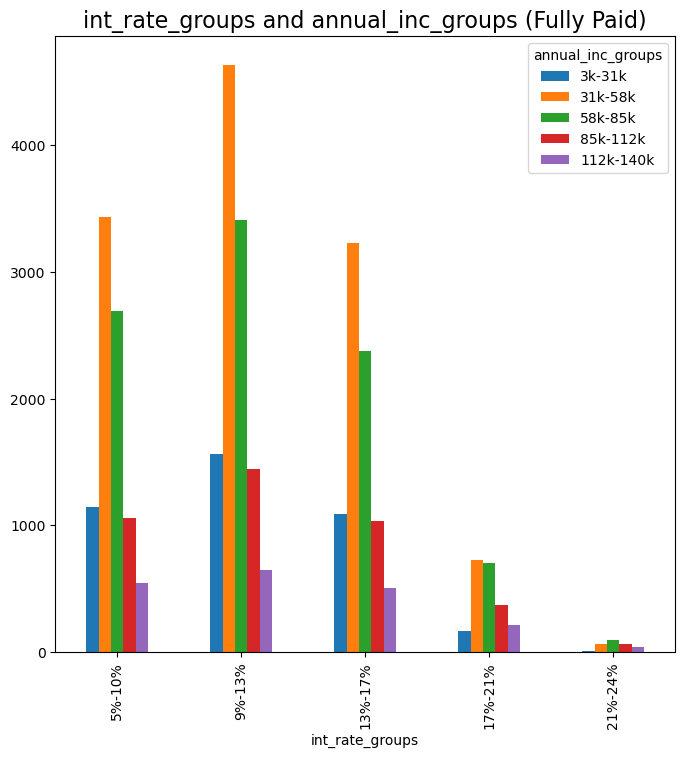

In [100]:
#plot 1 loan status - charged off
#crosstab function is used to create derived table by plotting int_rate_groups and annual_inc_groups
int_rate_crosstab = pd.crosstab(index=loan[loan['loan_status']=='Charged Off']['int_rate_groups'], 
                          columns=loan['annual_inc_groups'])
#plotting a bar plot of the created crosstab dataframe
int_rate_crosstab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)
#title of the plot
plt.title('int_rate_groups and annual_inc_groups (charged off)')
plt.show()

#plot 2 loan status - fully paid
#crosstab function is used to create derived table by plotting int_rate_groups and annual_inc_groups
int_rate_crosstab = pd.crosstab(index=loan[loan['loan_status']=='Fully Paid']['int_rate_groups'], 
                          columns=loan['annual_inc_groups'])
#plotting a bar plot of the created crosstab dataframe
int_rate_crosstab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)
#title of the plot
plt.title('int_rate_groups and annual_inc_groups (Fully Paid)')
plt.show()

#### Observation
- The people in income group 31k - 58k is most likely to fully pay the loan with interest rate 9-13%
- The people in income group 31k - 58k is high chance off defaulting the loan with interest rate 13-17%

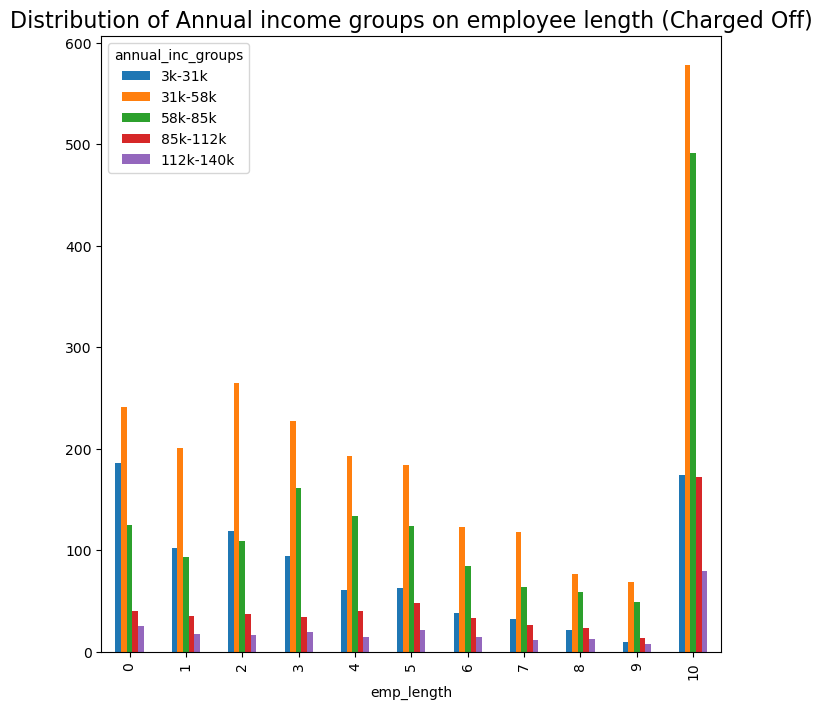

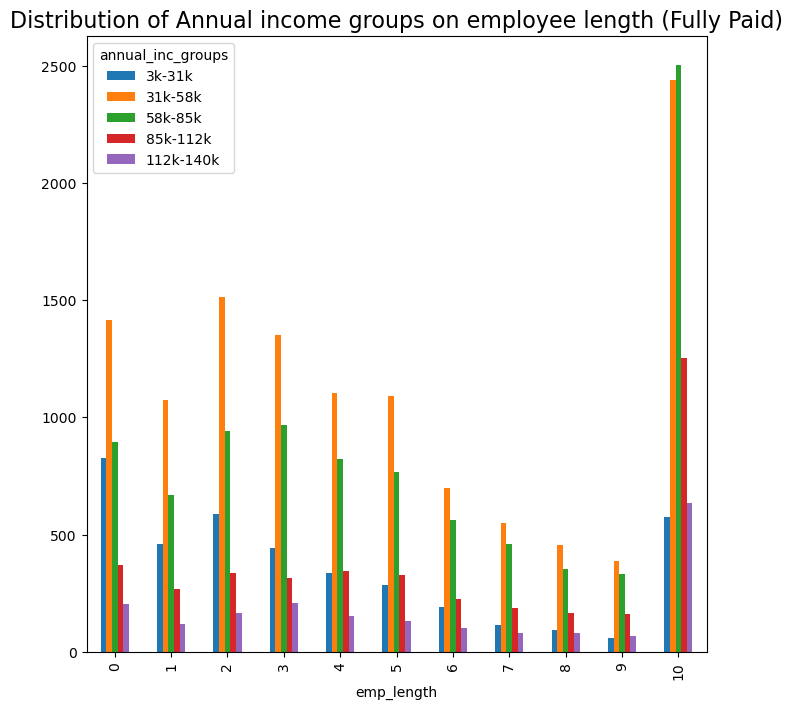

In [101]:
#plot 1 loan status - charged off
#crosstab function is used to create derived table by plotting emp_length and annual_inc_groups
emp_length_crosstab = pd.crosstab(index=loan[loan['loan_status']=='Charged Off']['emp_length'], 
                          columns=loan['annual_inc_groups'])
#plotting a bar plot of the created crosstab dataframe
emp_length_crosstab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)
#title of the plot
plt.title('Distribution of Annual income groups on employee length (Charged Off)')

#plot 2 loan status - fully paid
#crosstab function is used to create derived table by plotting emp_length and annual_inc_groups
emp_length_crosstab = pd.crosstab(index=loan[loan['loan_status']=='Fully Paid']['emp_length'], 
                          columns=loan['annual_inc_groups'])
#plotting a bar plot of the created crosstab dataframe
emp_length_crosstab.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)
#title of the plot
plt.title('Distribution of Annual income groups on employee length (Fully Paid)')
plt.show()

#### Observation 
    1. The employees with 10 + years of experience and a annual income of 31k - 58k are more likely to get charged off
    2. The employees with 10 + years of experience and a annual income of 51k - 85k are more likely to fully pay the loan

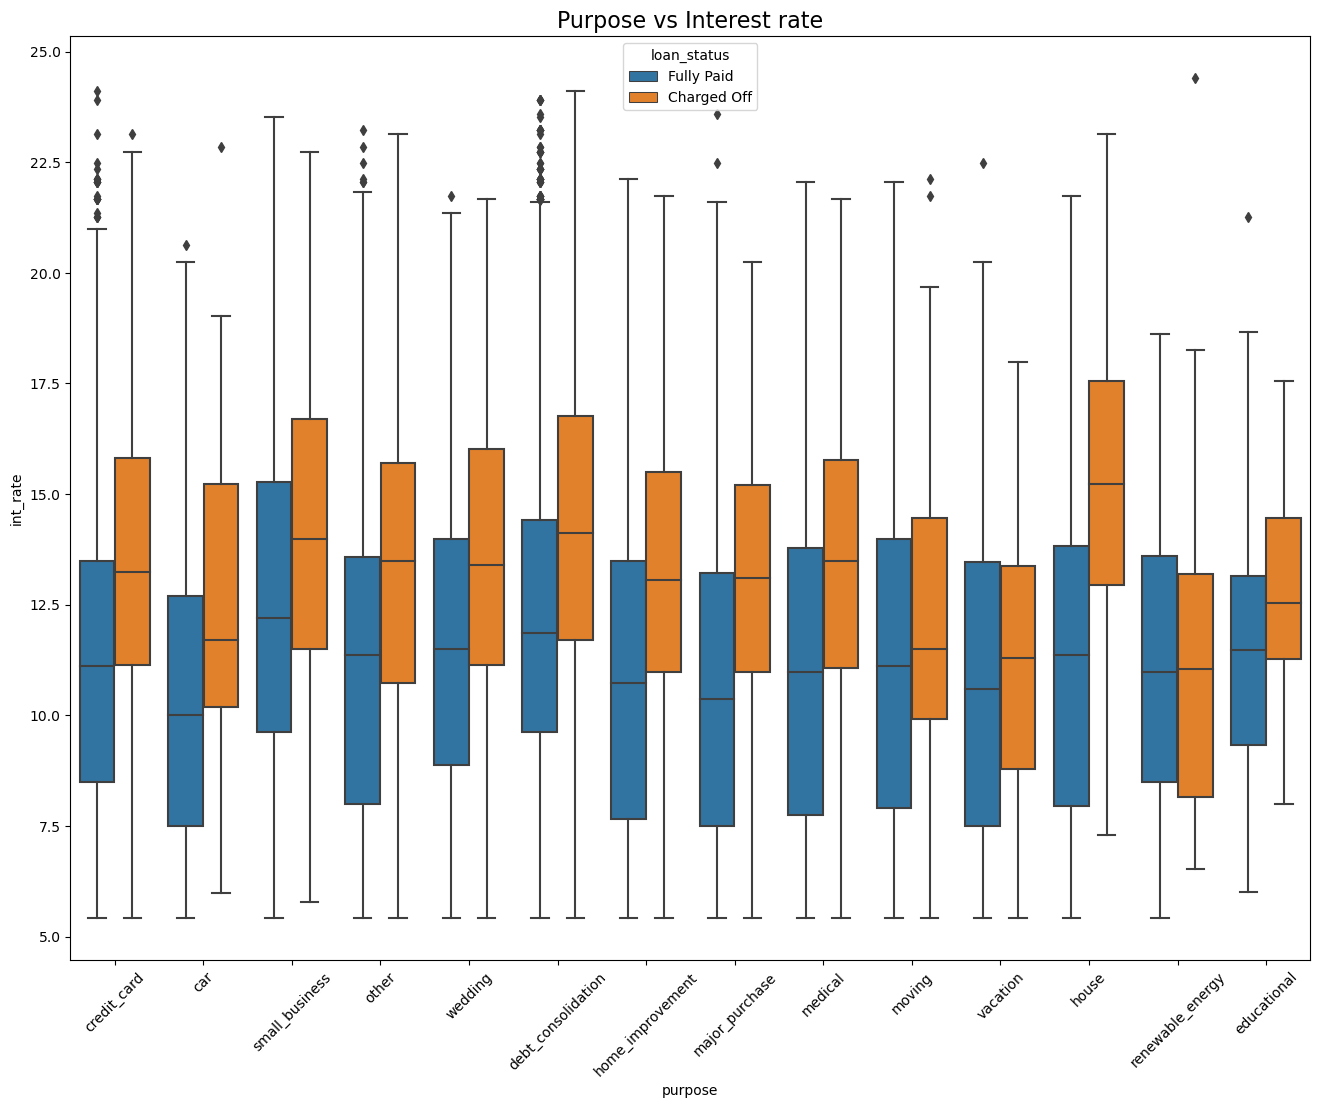

In [102]:
#setting the figure size to 16,12
plt.figure(figsize=(16,12))
#rotating the xticks by 45 degrees for better readablity
plt.xticks(rotation=45)
#plotting a boxplot purpose against int_rate hueed by loan_Status
sns.boxplot(data =loan, x='purpose',y='int_rate', hue ='loan_status',orient='v')
#title of the plot
plt.title('Purpose vs Interest rate')
#displaying the plot
plt.show()

#### Observation
- People who are buying loan for their house withing interest rate 12.5 - 17.5 are more likely to get charged off
- People who are buying loan for their house withing interest rate less than 13 are more likely to fully pay the loan
- Small_buisness loans with less interest (11%) are more likely to be fully paid
- Small_buisness loans with higher interest (11%) are more likely to be charged off
- Car loan within interest rates 7.5 to 10 are more likely to get Fully Paid
- Car loan with interest rates above 15 are more likely to get charged off

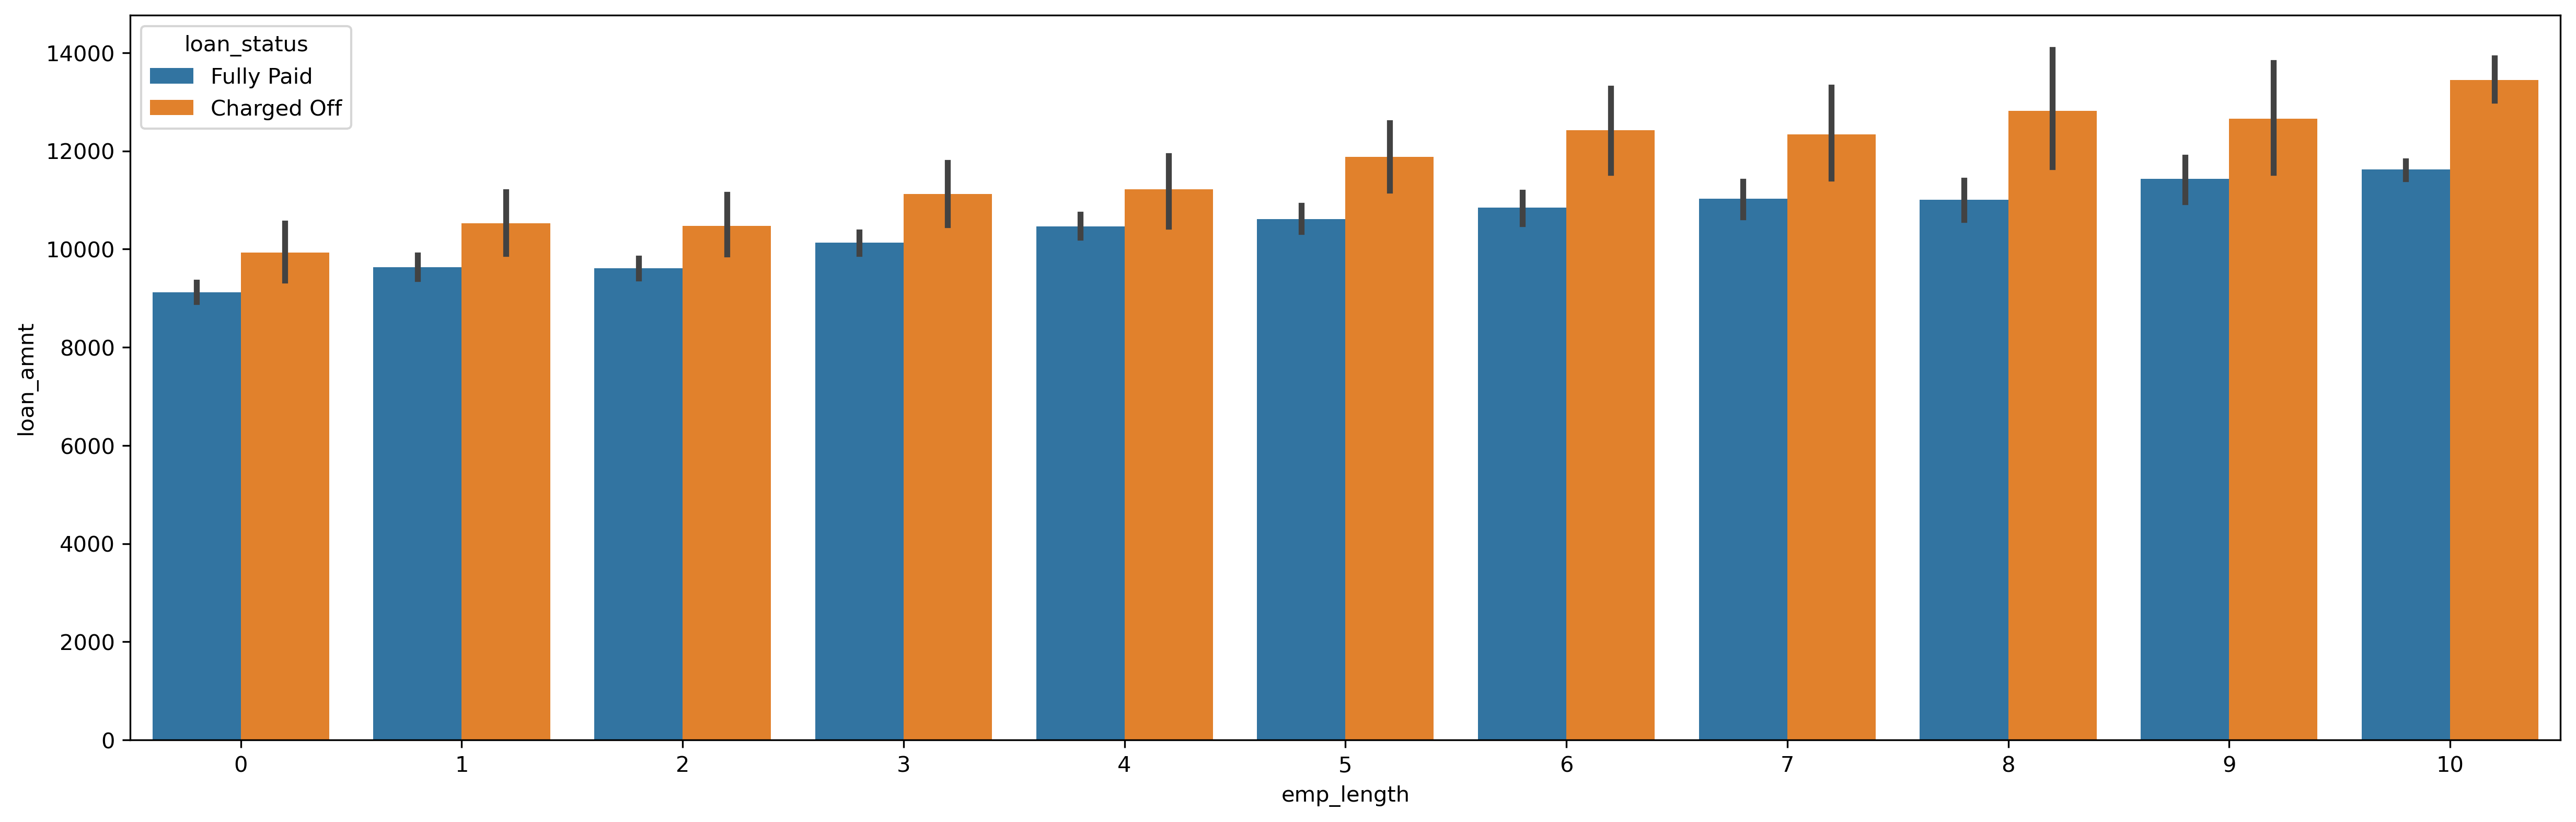

In [103]:
#declaring the fig size as 20,6
plt.figure(figsize= (20,6),dpi=300)
#plotting barplot against emp_length vs loan amnt hued by loan_status
sns.barplot(data=loan, x=loan['emp_length'], y=loan['loan_amnt'], hue=loan['loan_status'])
#displaying the plot
plt.show()

#### Observation
    1. We could see here that irrespective of emp_length when the loan_amnt increases probablity of Charged off is slightly increasing

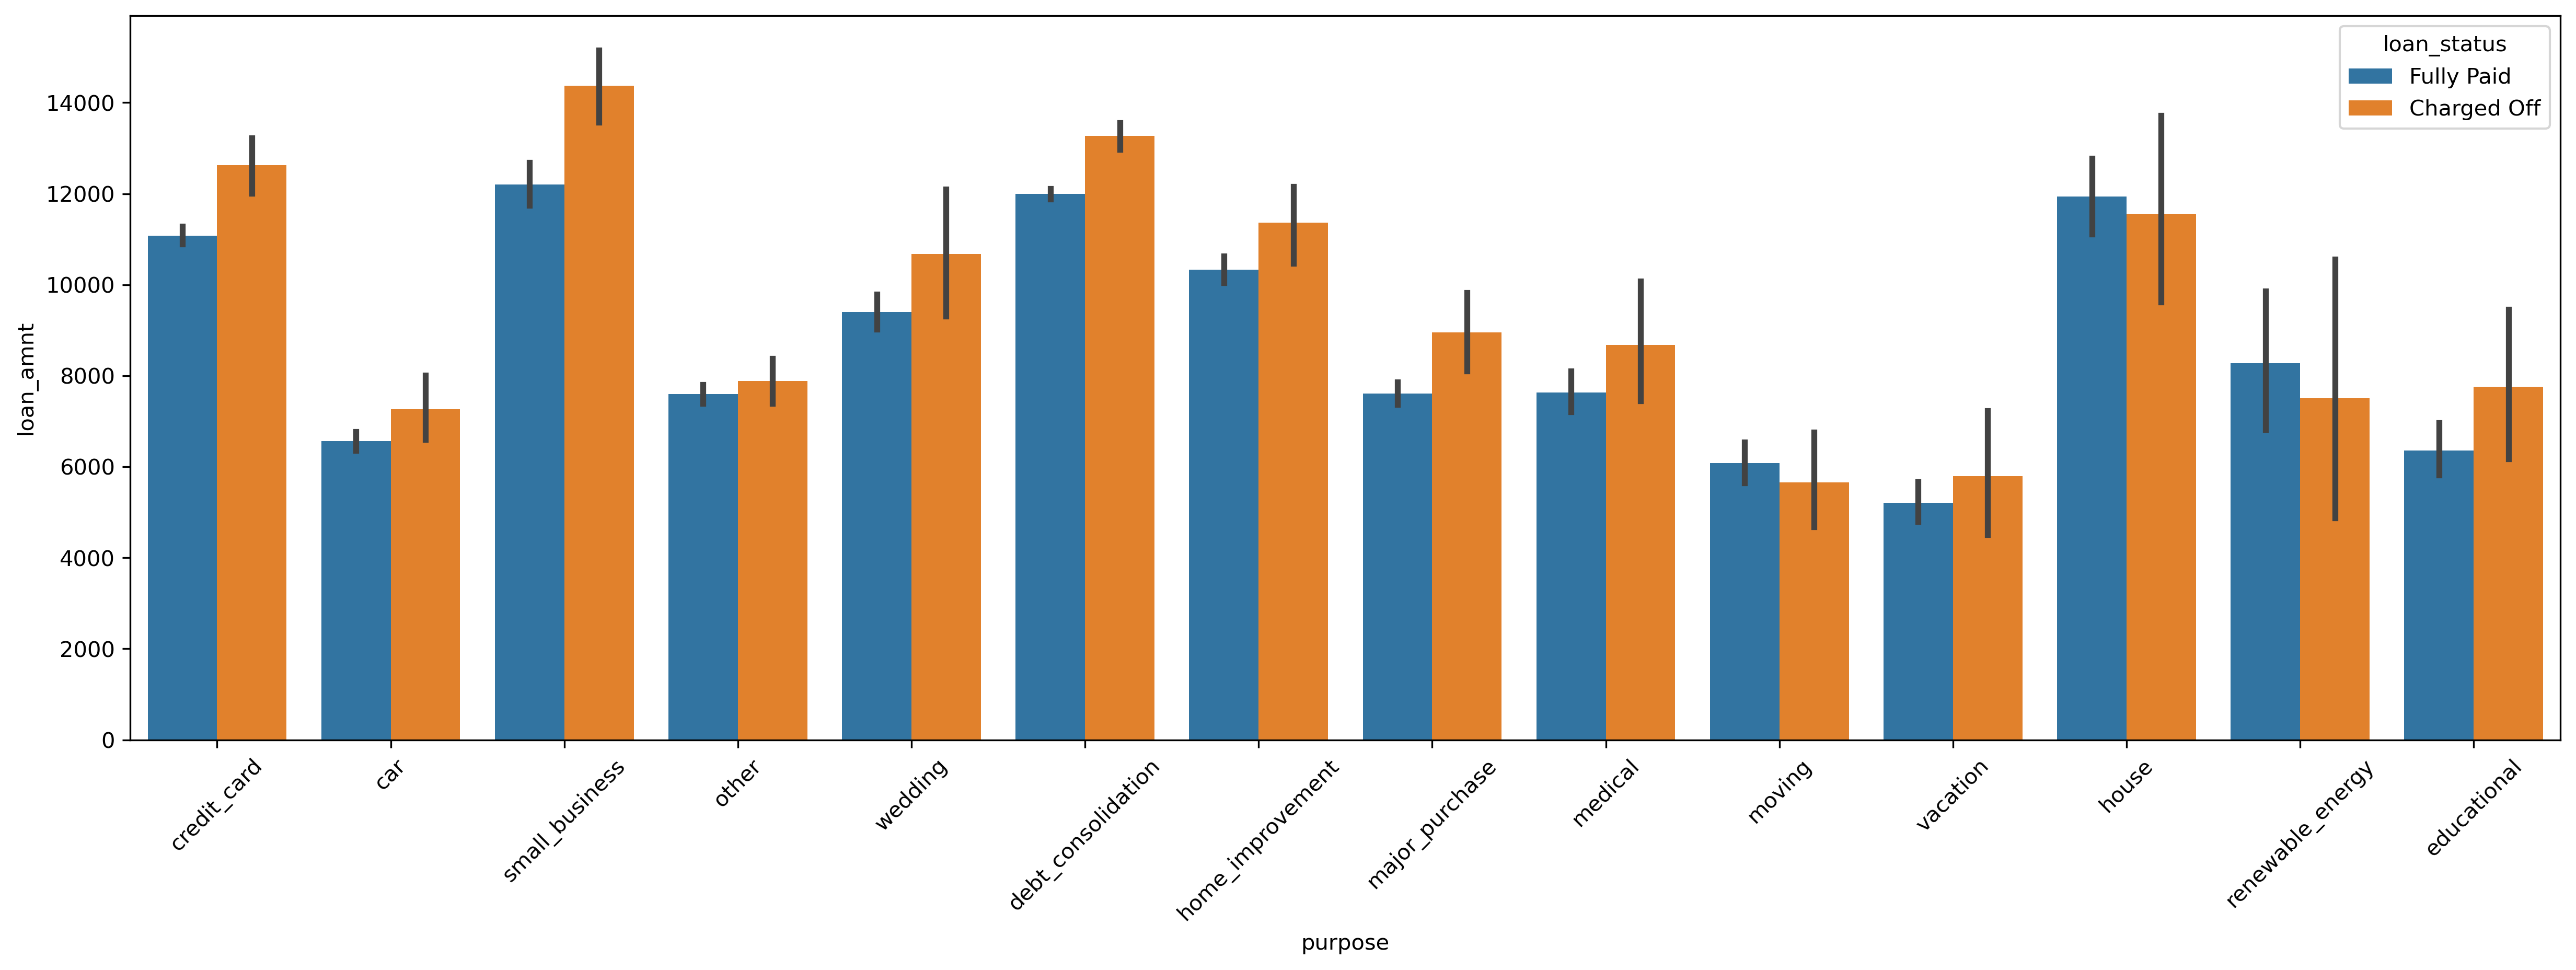

In [104]:
#declaring figsize of 20,6
plt.figure(figsize= (20,6),dpi=300)
#plotting borplot of purpose vs loan_amnt hued by loan_status
sns.barplot(data=loan, x=loan['purpose'], y=loan['loan_amnt'], hue=loan['loan_status'])
#xticks is rotated by 45 degrees for better readablity
plt.xticks(rotation = 45)
#displaing the plots
plt.show()

#### Observation 
- Loan amnt lesser than 12000 dollars has high chance for small buisiness of geting fully paid.
- Loan amnt higher than 12000 dollars has high chance for small buisiness of geting Charged off.

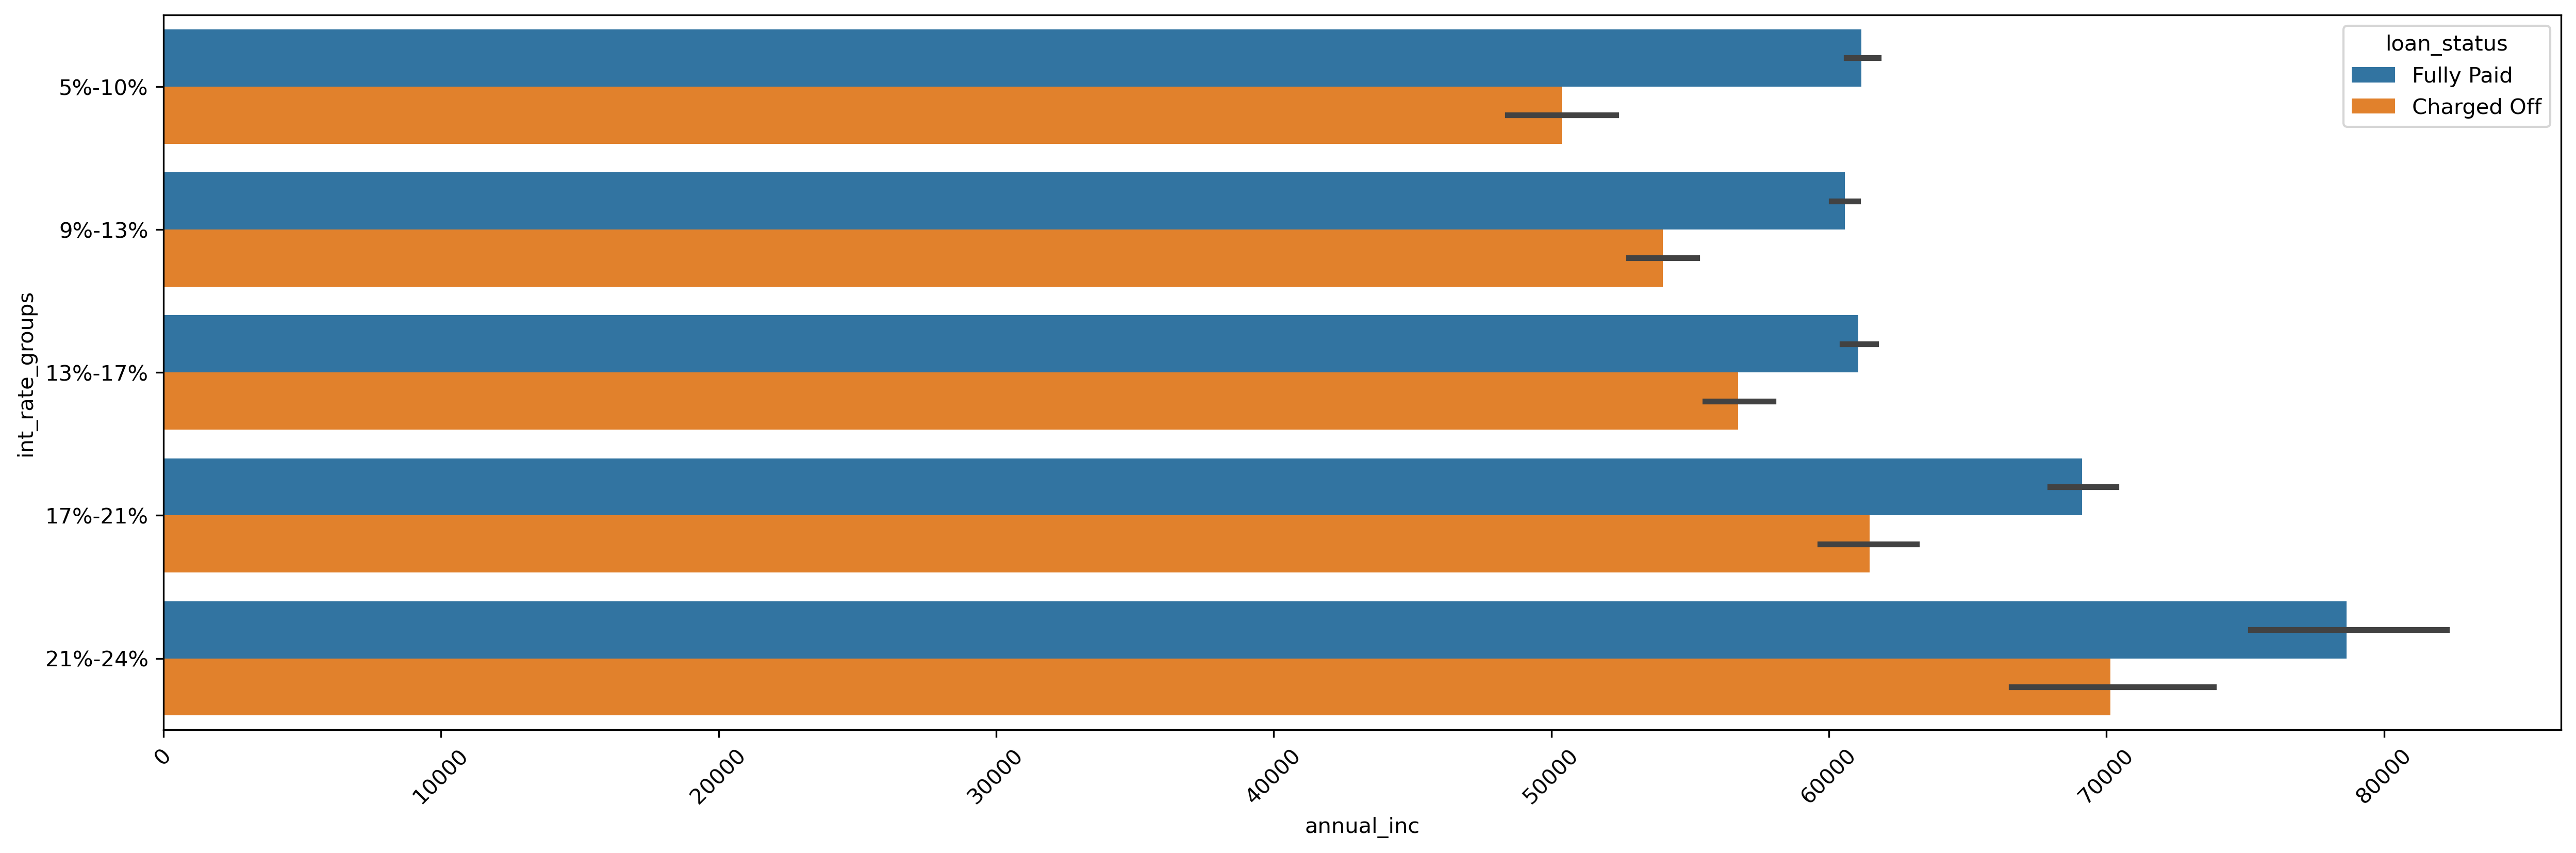

In [105]:
#declaring the fig size as 20,6
plt.figure(figsize= (20,6),dpi=300)
#plotting bar plot of annual_inc vs int_rate_groups hued by loan_status
sns.barplot(data=loan, y=loan['int_rate_groups'], x=loan['annual_inc'], hue=loan['loan_status'])
#setting x ticks rotation as 45 degrees for better readablity
plt.xticks(rotation = 45)
#displaying the plot
plt.show()

#### Observation
- Intrest rate group in 21 - 24% having annual income 70k+ has the good candidated for offering the loan

# Recommendations

## Probability of defaulters 
- Loan amnt higher than 12000 dollars for small buisiness has slightly high chance of geting Charged off.
- The employees with 10+ years of experience and a annual income of 31k - 58k are more likely to get charged off
- People who are buying loan for their house between interest rate 12.5 - 17.5 are more likely to get charged off
- Car loan with interest rates above 15 are more likely to get charged off
- Small_buisness loans with higher interest (above 11%) are more likely to be charged off
- The People in 31k - 58 k income group with house in mortgage or living in a rented house has higher chance of defaulting the loan
- The people who are buying loan for debt consolidation with home ownership has rent or mortgage has higher chance of getting charged off
- The people in income group 31k - 58k is high chance off defaulting the loan with interest rate 13-17%


## Probability of eligible candidates
- The employees with 10+ years of experience and a annual income of 51k - 85k are more likely to fully pay the loan
- People who are buying loan for their house less than 13% interest are more likely to fully pay the loan
- Car loan within interest rates 7.5 to 10 are more likely to get Fully Paid
- Small_buisness loans with less interest (11%) are more likely to be fully paid
- Loan amount lesser than 12000 dollars for small buisiness has high chance of geting fully paid.
- The People in 31k - 58 k income group with a own house has higher chance of paying the loan
- Intrest rate group in 21 - 24% having annual income 70k+ has the good candidated for offering the loan
- The people in income group 31k - 58k is most likely to fully pay the loan with interest rate 9-13%
